<a href="https://colab.research.google.com/github/AbhishekThakur0126/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Capstone Project : Mobile Price Range Prediction**





##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Abhishek Thakur

#**Problem Statement**

In the competitive mobile phone market, companies aim to analyze the sales data of mobile phones and identify the key factors that influence the prices of these devices. The objective of this analysis is to establish a relationship between various features of a mobile phone, such as RAM, Internal Memory, etc., and its selling price. Instead of predicting the exact price of a mobile phone, the goal is to categorize the prices into price ranges, indicating the relative price level of each device.
By applying Data Analysis and Modeling techniques, the aim is to understand which features have a significant impact on the price range of a mobile phone. This information will help companies make informed decisions about their product offerings, pricing strategies, and market positioning to remain competitive in the dynamic mobile phone industry.

#**Project Summary**

This project aims to analyze a dataset comprising crucial features associated with mobile phones and their corresponding prices, with the primary objective of identifying factors that influence mobile phone prices and categorizing them into distinct price ranges.

The project commences with thorough data exploration and analysis, encompassing tasks such as data cleaning, outlier detection, and treatment to ensure the data's quality and reliability.

To enhance the predictive capabilities, feature engineering techniques are applied, creating meaningful predictors such as the RAM to Internal Memory ratio and combined scores for Camera Quality and Battery Capacity.

Subsequent to feature engineering, exploratory data analysis (EDA) is conducted to visually represent relationships between various features and selling prices, unveiling patterns and correlations that can guide the subsequent modeling phase.

The final stage involves constructing a predictive model utilizing machine learning algorithms to effectively categorize mobile phone prices into specific ranges. Rigorous evaluation of the model's performance is carried out to ensure precise predictions of price ranges.

By identifying key price drivers and developing a robust predictive model, this project aims to furnish mobile phone companies with actionable insights, enabling them to optimize their product offerings and thrive in the competitive market.

##**Variable Description**

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of

0(low cost),

1(medium cost),

2(high cost) and

3(very high cost).

Thus our target variable has 4 categories so basically it is a Multiclass
classification problem.

#**Importing Libraries**

In [29]:
# Import Libraries
import numpy as np
import pandas as pd

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Importing Metric Evaluation Libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc


#**Dataset Loading**

In [30]:
from google.colab import files

# Upload the .csv file
uploaded = files.upload()

Saving data_mobile_price_range.csv to data_mobile_price_range (1).csv


In [31]:
mobile_df = pd.read_csv("data_mobile_price_range.csv")

##**Dataset First View**

In [32]:
# Dataset First Look

mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [33]:
#Last look
mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


##**Dataset Rows & Columns count**

In [34]:
# Dataset Rows & Columns count

mobile_df.shape

(2000, 21)

In [35]:
print(f"Row Count :{mobile_df.shape[0]}\nColumn Count:{mobile_df.shape[1]}")

Row Count :2000
Column Count:21


There are total 2000 datapoints , 20 Independent Variables and 1 Target Variable.

##**Dataset Information**

In [36]:
# Dataset Info

mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## **Duplicate Value Check**

In [37]:
# Dataset Duplicate Value Count
duplicated_count = mobile_df.duplicated().sum()
duplicated_count

0

**Dataset doesn't contain any duplicate values**


## **Missing Value /Null Value Check**

In [38]:
# Missing Values/Null Values Count

missing_values_count = mobile_df.isnull().sum()
missing_values_count

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**There are no null values in the dataset**

**So Dataset consists 2,000 data points across 21 columns with no null values or duplicated records.**

## **Understanding Your Variables**

In [39]:
# Dataset Describe
mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


The presence of minimum values of 0 in attributes such as front camera, primary camera, sc_width, and px_height is inconsistent with the typical specifications of mobile devices, suggesting a potential data discrepancy. It is necessary to address and handle these anomalies to ensure the data accurately reflects realistic mobile device characteristics.

In [40]:
# Dataset Columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [41]:
# Numerical Columns

Numerical_columns = mobile_df.describe().columns
Numerical_columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [42]:
# Categorical Columns

Categorical_columns = mobile_df.select_dtypes(include=['object','category']).columns
Categorical_columns

Index([], dtype='object')

##**Unique Value Check**

In [43]:
# Check Unique Values for each variable.
mobile_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

**Price Range which is our Target Variable has 4 Unique Values . That means its a Multiclass Category Problem.**

##**Data Wrangling**

The presence of minimum values of 0 in attributes such as front camera, primary camera, sc_width, and px_height is inconsistent with the typical specifications of mobile devices, suggesting a potential data discrepancy. It is necessary to address and handle these anomalies to ensure the data accurately reflects realistic mobile device characteristics.

In [44]:
zero_fc_count = mobile_df.query('fc == 0').shape[0]
print(zero_fc_count)

474


The observations with a primary camera megapixel value of 0 may represent mobile phones that do not have a front camera. It is important to consider this possibility when analyzing the dataset, as zero values in this context could indicate the absence of the specific feature rather than a data discrepancy.

In [45]:
zero_pc_count = mobile_df.query('pc == 0').shape[0]
print(zero_pc_count)

101


The observations with a primary camera megapixel value of 0 might indicate mobile phones that lack a primary camera. It is essential to consider this scenario when interpreting the dataset, as a value of zero in this context could signify the absence of the primary camera feature rather than a data anomaly.

In [46]:
# Checking How many observations having Pixel Resolution Height value as 0.

print(mobile_df[mobile_df['px_height']==0].shape[0])

2


In [47]:
mobile_df[mobile_df['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [48]:
# Dropping these 2 rows and again resetting the index

mobile_df.drop([1481,1933],axis=0,inplace=True)
mobile_df.reset_index(drop=True, inplace=True)

In [49]:
# Checking How many observations having Screen Width value as 0.

print(mobile_df[mobile_df['sc_w']==0].shape[0])

179


It is highly unlikely for a mobile phone's screen width (Sc_width) to be 0, and the presence of 179 such records suggests a potential data issue. Imputation or correction methods should be applied to address these anomalies and ensure the dataset accurately reflects realistic values for mobile device attributes.

**Replacing Null Values**

In [50]:
# Replacing 0 with NAN so that we can implement KNN Imputer.

mobile_df['sc_w'].replace(0,np.nan,inplace=True)

Utilizing the KNN method for imputation, the KNN Imputer takes into account the values of the k-nearest neighbors to estimate and fill in missing values for each data point within the specified column. This approach leverages the information from neighboring data instances to enhance the accuracy of imputed values in the dataset

In [51]:
# import KNN imputer from sklearn

from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_df=pd.DataFrame(impute_knn.fit_transform(mobile_df),columns = mobile_df.columns)

In [52]:
# Checking How many observations having sc_w value as 0.

mobile_df[mobile_df['sc_w']==0].shape[0]

0

In [53]:
mobile_df.shape

(1998, 21)

**All inconsistencies in the dataset, including rectifying values that deviated from expected ranges, have been addressed and corrected.**

## **Outlier Detection**

Outliers refer to data points that exhibit substantial deviation from the typical pattern observed in the majority of the dataset. These exceptional data points reside considerably distant from the central tendency, positioned either at the extremes of the value range, higher or lower than the typical distribution

In [54]:
# Creating the list Columns which may contain outliers
possible_outlier_columns = mobile_df.select_dtypes(include='number').columns.tolist()
possible_outlier_columns = [col for col in possible_outlier_columns if col not in {'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'}]
possible_outlier_columns

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

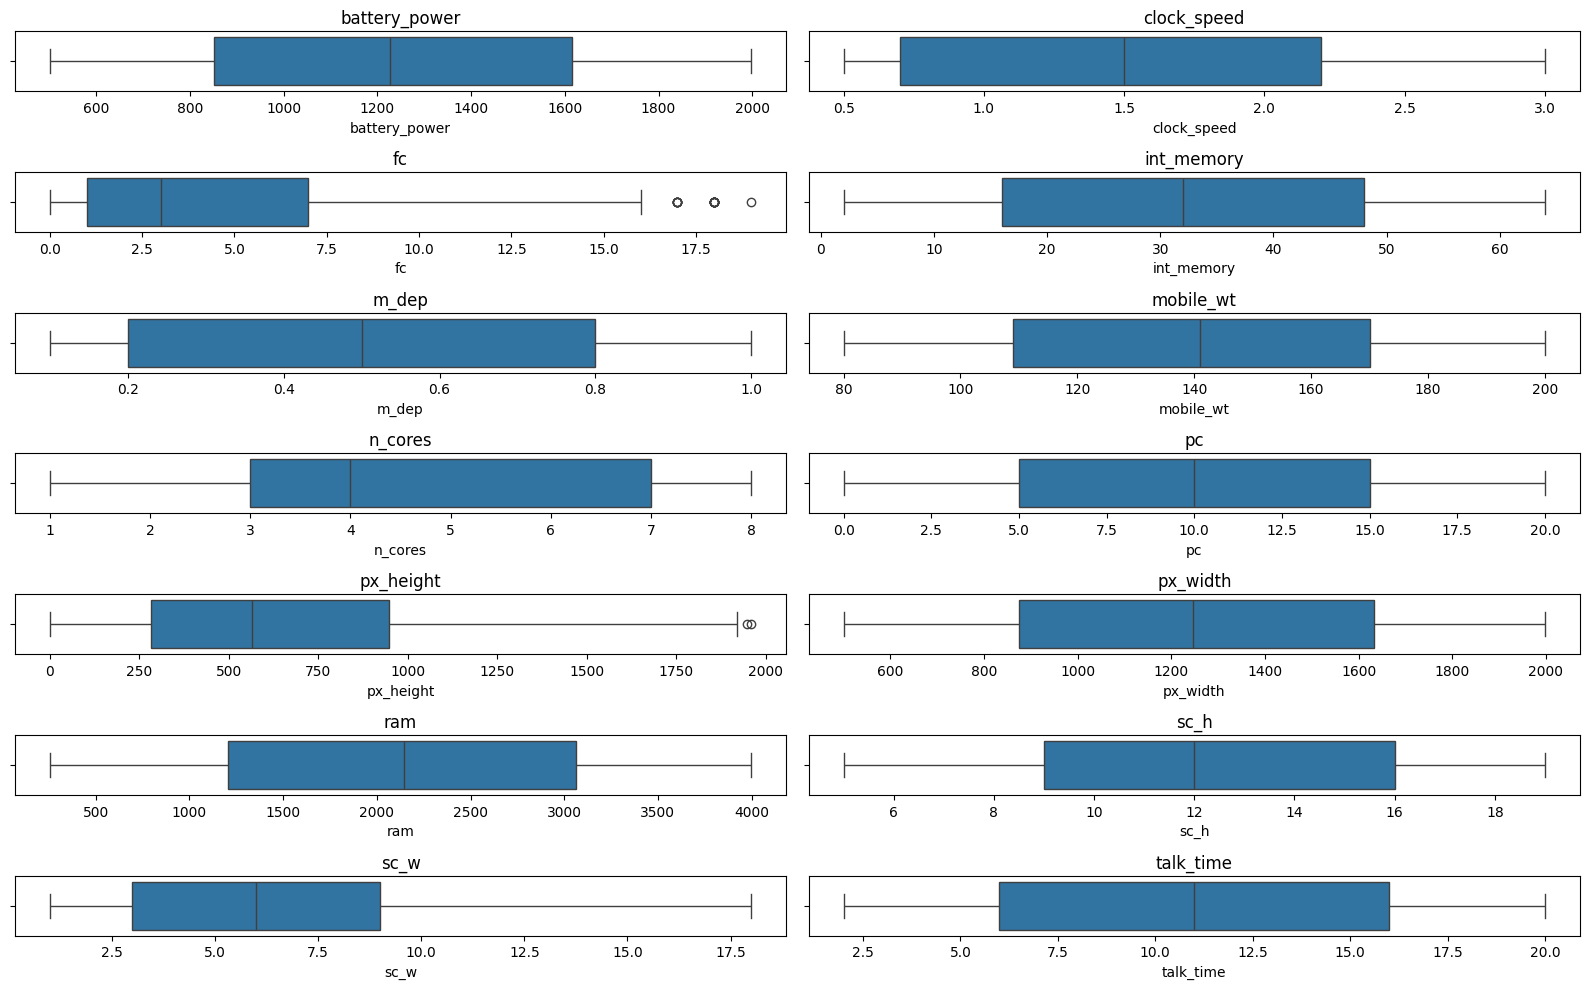

In [55]:
plt.figure(figsize=(16, 10))

num_cols = 2
num_rows = len(possible_outlier_columns) // num_cols + len(possible_outlier_columns) % num_cols

for index, item in enumerate(possible_outlier_columns):
    plt.subplot(num_rows, num_cols, index+1)
    sns.boxplot(x=mobile_df[item])
    plt.title(item)

plt.tight_layout()
plt.show()


**Outliers are observed in the 'fc' and 'px_width' columns based on the boxplot visualizations.**

In [56]:
# Creating a list of Columns that contain Outliers

Col_with_outliers = ['fc','px_height']
Col_with_outliers


['fc', 'px_height']

In [57]:
Q1 = mobile_df[Col_with_outliers].quantile(0.25)
Q3 = mobile_df[Col_with_outliers].quantile(0.75)
IQR = Q3-Q1
IQR.T

fc             6.00
px_height    663.75
dtype: float64

In [58]:
# Calculating the Upperside and Lowerside Outlier

Upper_Whisker = Q3 + (1.5*IQR)
Lower_Whisker = Q1 - (1.5*IQR)


In [59]:
Upper_Whisker

fc             16.000
px_height    1943.375
dtype: float64

In [60]:
Lower_Whisker

fc            -8.000
px_height   -711.625
dtype: float64

In [61]:
# Filtering the outliers from the dataframe

mobile_df[Col_with_outliers] = mobile_df[Col_with_outliers][~((mobile_df[Col_with_outliers] < Lower_Whisker) | (mobile_df[Col_with_outliers] > Upper_Whisker))]

In [62]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1980 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

In [63]:
# Replacing the null values which created due to outlier removal

mobile_df['fc'].fillna(mobile_df['fc'].median(),inplace=True)
mobile_df['px_height'].fillna(mobile_df['px_height'].median(),inplace=True)

**These columns  have skewed distributions or the presence of outliers. When dealing with skewed data or outliers, mean imputation can be sensitive to extreme values, potentially leading to biased results. In such cases, using the median as a central measure is more robust, as it is less affected by extreme values.**

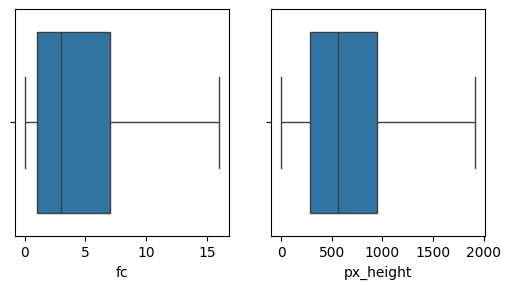

In [64]:
plt.figure(figsize=(16,10))
for index,item in enumerate(Col_with_outliers):
  plt.subplot(3,5,index+1)
  sns.boxplot(x=mobile_df[item], data=mobile_df)



**I have effectively eliminated the outliers**.

##**Feature Engineering**

In [65]:
# Creating a new feature based on given features sc_h  and sc_w  to represent overall Display Size

mobile_df['Display_size'] = mobile_df['sc_h'] * mobile_df['sc_w']

In [66]:
# Creatin a new feature based on given features px_height and px_width to represent Display Resolution area

mobile_df['Total_Pixels'] = mobile_df['px_height'] * mobile_df['px_width']

In [67]:
# Dropping unnecessary columns from the dataset

mobile_df.drop(['sc_h','sc_w','px_height','px_width'],axis=1,inplace=True)

In [68]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  ram            1998 non-null   float64
 12  talk_time      1998 non-null   float64
 13  three_g        1998 non-null   float64
 14  touch_screen   1998 non-null   float64
 15  wifi           1998 non-null   float64
 16  price_range    1998 non-null   float64
 17  Display_size   1998 non-null   float64
 18  Total_Pi

In [69]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,Display_size,Total_Pixels
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,2549.0,19.0,0.0,0.0,1.0,1.0,63.0,15120.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,2631.0,7.0,1.0,1.0,0.0,2.0,51.0,1799140.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,2603.0,9.0,1.0,1.0,0.0,2.0,22.0,2167308.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,2769.0,11.0,1.0,0.0,0.0,2.0,128.0,2171776.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1411.0,15.0,1.0,1.0,0.0,1.0,16.0,1464096.0


## **Data Visualizations**

**1.Relationship between ram and price_range**

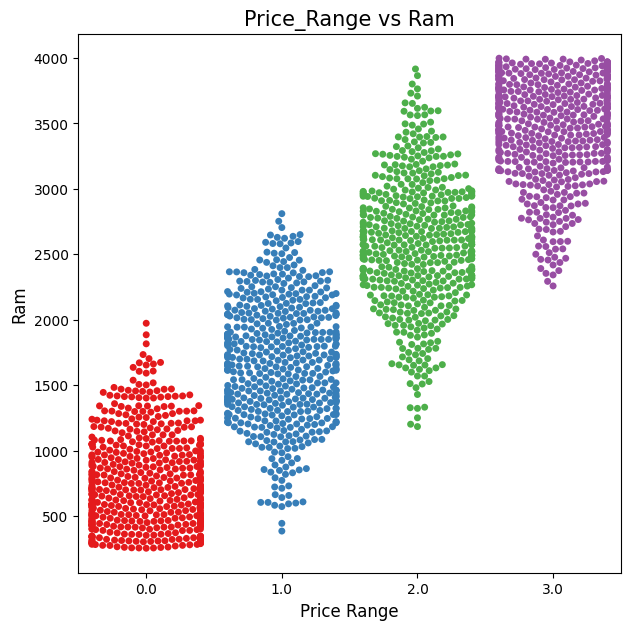

In [70]:
plt.figure(figsize=(7, 7))
sns.swarmplot(x=mobile_df['price_range'], y=mobile_df['ram'], palette='Set1')
plt.title('Price_Range vs Ram', size=15)
plt.xlabel('Price Range', size=12)
plt.ylabel('Ram', size=12)
plt.show()


I have selected a Swarm Chart to visually compare the RAM quantities across different Price Ranges. Swarm Charts are especially effective for presenting categorical or discrete data points. The mobile phones exhibit a notable variation in price ranges, with some featuring ample RAM, and others offering more modest capacities.
* **A discernible trend is observed, indicating that higher RAM capacities correspond to higher mobile device prices.**

**2.Price Range vs Battery Power**

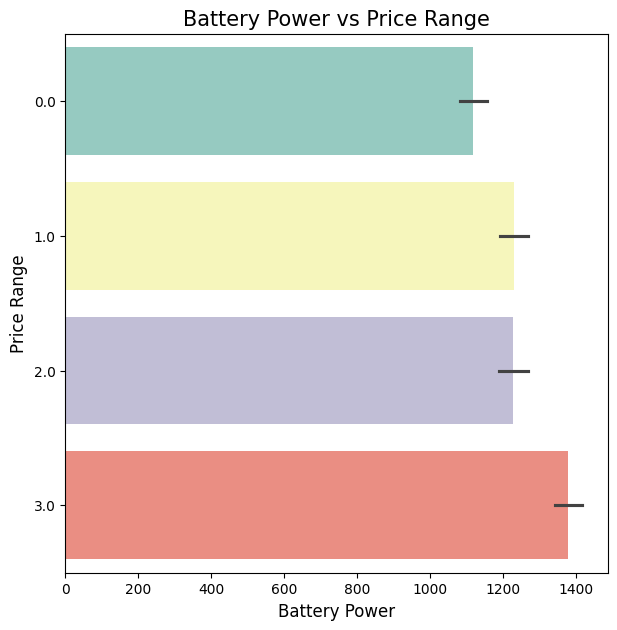

In [71]:

plt.figure(figsize=(7, 7))
sns.barplot(x=mobile_df['battery_power'], y=mobile_df['price_range'], palette='Set3', orient='h')
plt.title('Battery Power vs Price Range', size=15)
plt.xlabel('Battery Power', size=12)
plt.ylabel('Price Range', size=12)
plt.show()


**Insights**
* I chose a specific chart to visually compare Battery Power values across different Price Ranges.
* Bar charts excel at displaying categorical or discrete data points, making them ideal for this analysis.
* Mobile phones are available in various price ranges, showcasing differences in battery power.
* Some phones boast high battery power, while others have a more modest capacity.
* Notably, a straightforward trend emerges  higher battery power correlates with a higher cost for the mobile phone.

**3.Relationship : Price Range vs Display Resolution**

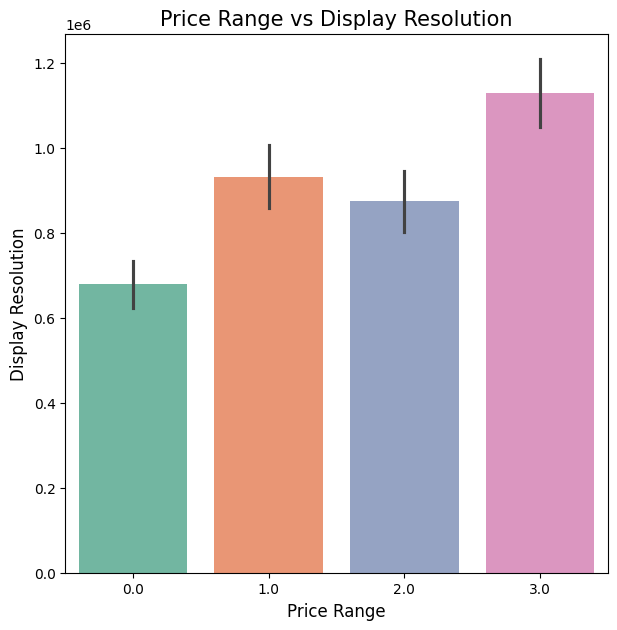

In [72]:
plt.figure(figsize=(7, 7))
new_palette = sns.color_palette("Set2", n_colors=4)
sns.barplot(x=mobile_df['price_range'], y=mobile_df['Total_Pixels'], palette=new_palette)
plt.title('Price Range vs Display Resolution', size=15)
plt.xlabel('Price Range', size=12)
plt.ylabel('Display Resolution', size=12)
plt.show()



**Insights**
* I opted for a specific chart to effectively display and compare Total Pixels across diverse Price Ranges.
* Bar charts are well-suited for presenting categorical or distinct data points, making them an ideal choice for this analysis.
* Mobile devices are available in a wide range of price categories, showcasing differences in Total Pixels.
* Some devices exhibit impressive High Display Resolutions, characterized by a higher pixel count, while others have lower counts.
* A noticeable correlation emerges: devices with greater Total Pixels typically carry a higher price tag.

**4.Relationship : Display vs Size**

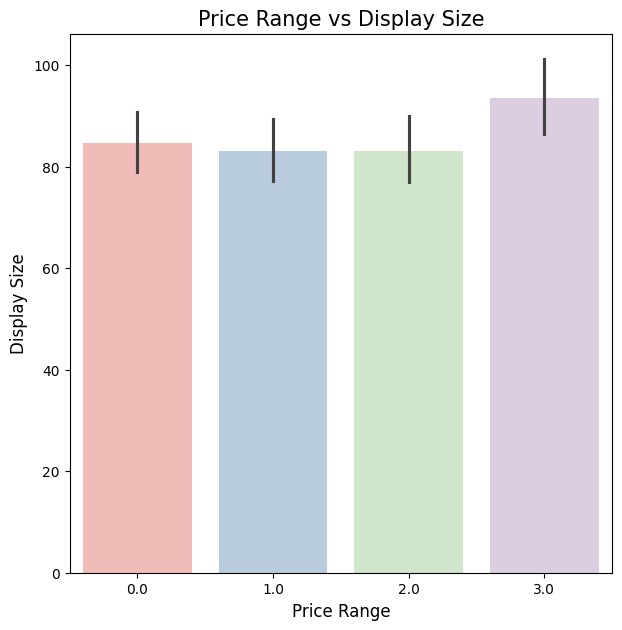

In [73]:
plt.figure(figsize=(7, 7))
new_palette = sns.color_palette("Pastel1", n_colors=4)
sns.barplot(x=mobile_df['price_range'], y=mobile_df['Display_size'], palette=new_palette)
plt.title('Price Range vs Display Size', size=15)
plt.xlabel('Price Range', size=12)
plt.ylabel('Display Size', size=12)
plt.show()


**Insights:**
* I specifically opted for a chart to visualize and compare Display Size across diverse Price Ranges effectively.
* Bar charts excel in presenting categorical or distinct data points, making them apt for this analysis.
* Display Size, while not the dominant factor in determining Price Range fluctuations, holds significance.
* Notably, choosing a larger Display Size for a mobile phone is associated with a slightly elevated cost.
* This observation adds nuance to the relationship between Display Size and its impact on mobile phone pricing.

**5.Univariate Analysis of Binary Categorical Variables**

A donut chart, also known as a doughnut chart, is a type of graph used for visualizing data in a circular format. It is particularly useful for univariate analysis of binary categorical variables, where the data can be divided into two categories or classes. Here's an explanation of how a donut chart is used for such analysis:

**Representation of Binary Categorical Variables**:

Binary categorical variables have two possible outcomes or classes, such as "Yes" or "No," "True" or "False," or "Success" or "Failure."

**Circular Visualization:**

A donut chart is a circular chart with a hole in the center, resembling a donut. The outer ring represents the whole data set, and the inner hole can be utilized for additional information or labels.
Proportion Display:

In the context of binary categorical variables, the donut chart illustrates the proportion or percentage distribution of each category within the entire dataset.

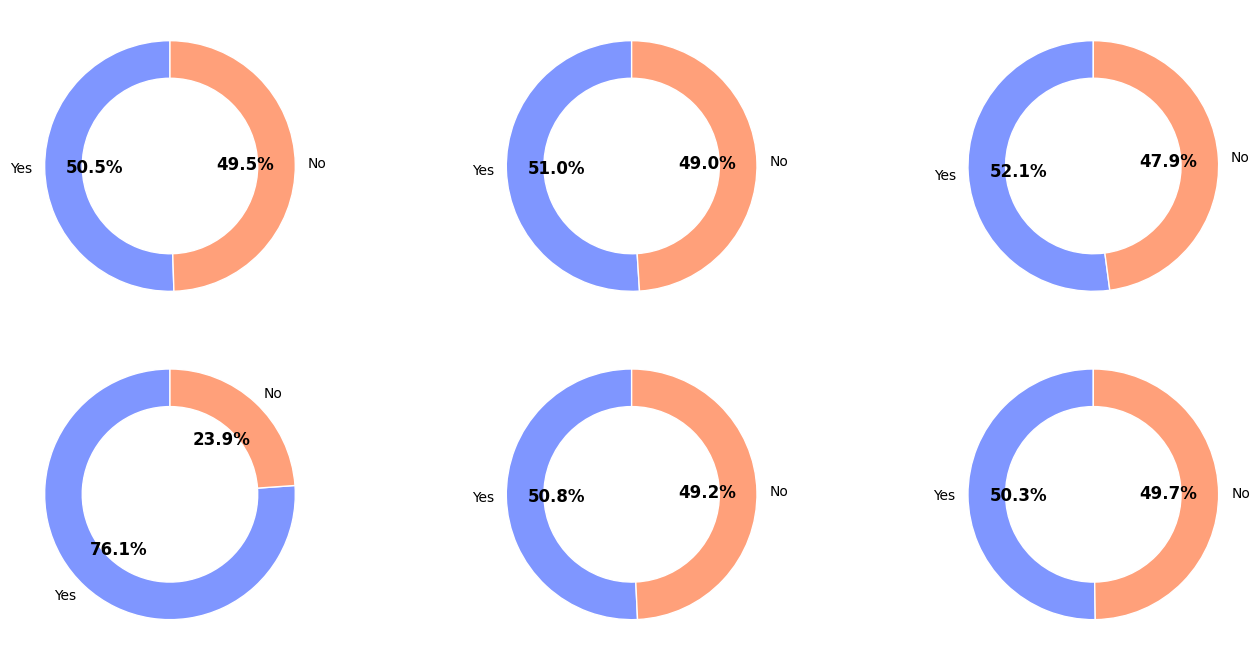

In [74]:


plt.figure(figsize=(14, 10))

rows = 3
col = 3
count = 1
var_list = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']
labels = ['Yes', 'No']
colors = ['#7f96ff', '#ffa07a']  # Change colors to your preferred ones

for var in var_list:
    plt.subplot(rows, col, count)
    data = mobile_df[var].value_counts()
    wedges, texts, autotexts = plt.pie(data, autopct='%1.1f%%', startangle=90, colors=colors, labels=labels, wedgeprops=dict(width=0.3))

    # Make it a donut chart
    for wedge in wedges:
        wedge.set_edgecolor('white')

    plt.setp(autotexts, size=12, weight="bold")

    # Draw a white circle in the center to create a donut chart
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.tight_layout()
    count += 1

plt.show()


**Insights:**
* I've opted for a specific chart to conduct univariate analysis on binary categorical variables like Bluetooth, Dual SIM, 4G, WiFi, and Touch Screen to comprehend the distribution of mobile phones in each category.

* The analysis unveils that the percentage distribution across Bluetooth, Dual SIM, 4G, WiFi, and Touch Screen functionalities is nearly equal, with each category representing approximately 50% of the total.

* Interestingly, a marginal portion, accounting for only 23.8%, of mobile phones lacks Three_g functionality, indicating that the vast majority of devices in the dataset are equipped with 3G capability.

**6.understand the relationship between Price Range which is our dependent variable and other Continous variables.**


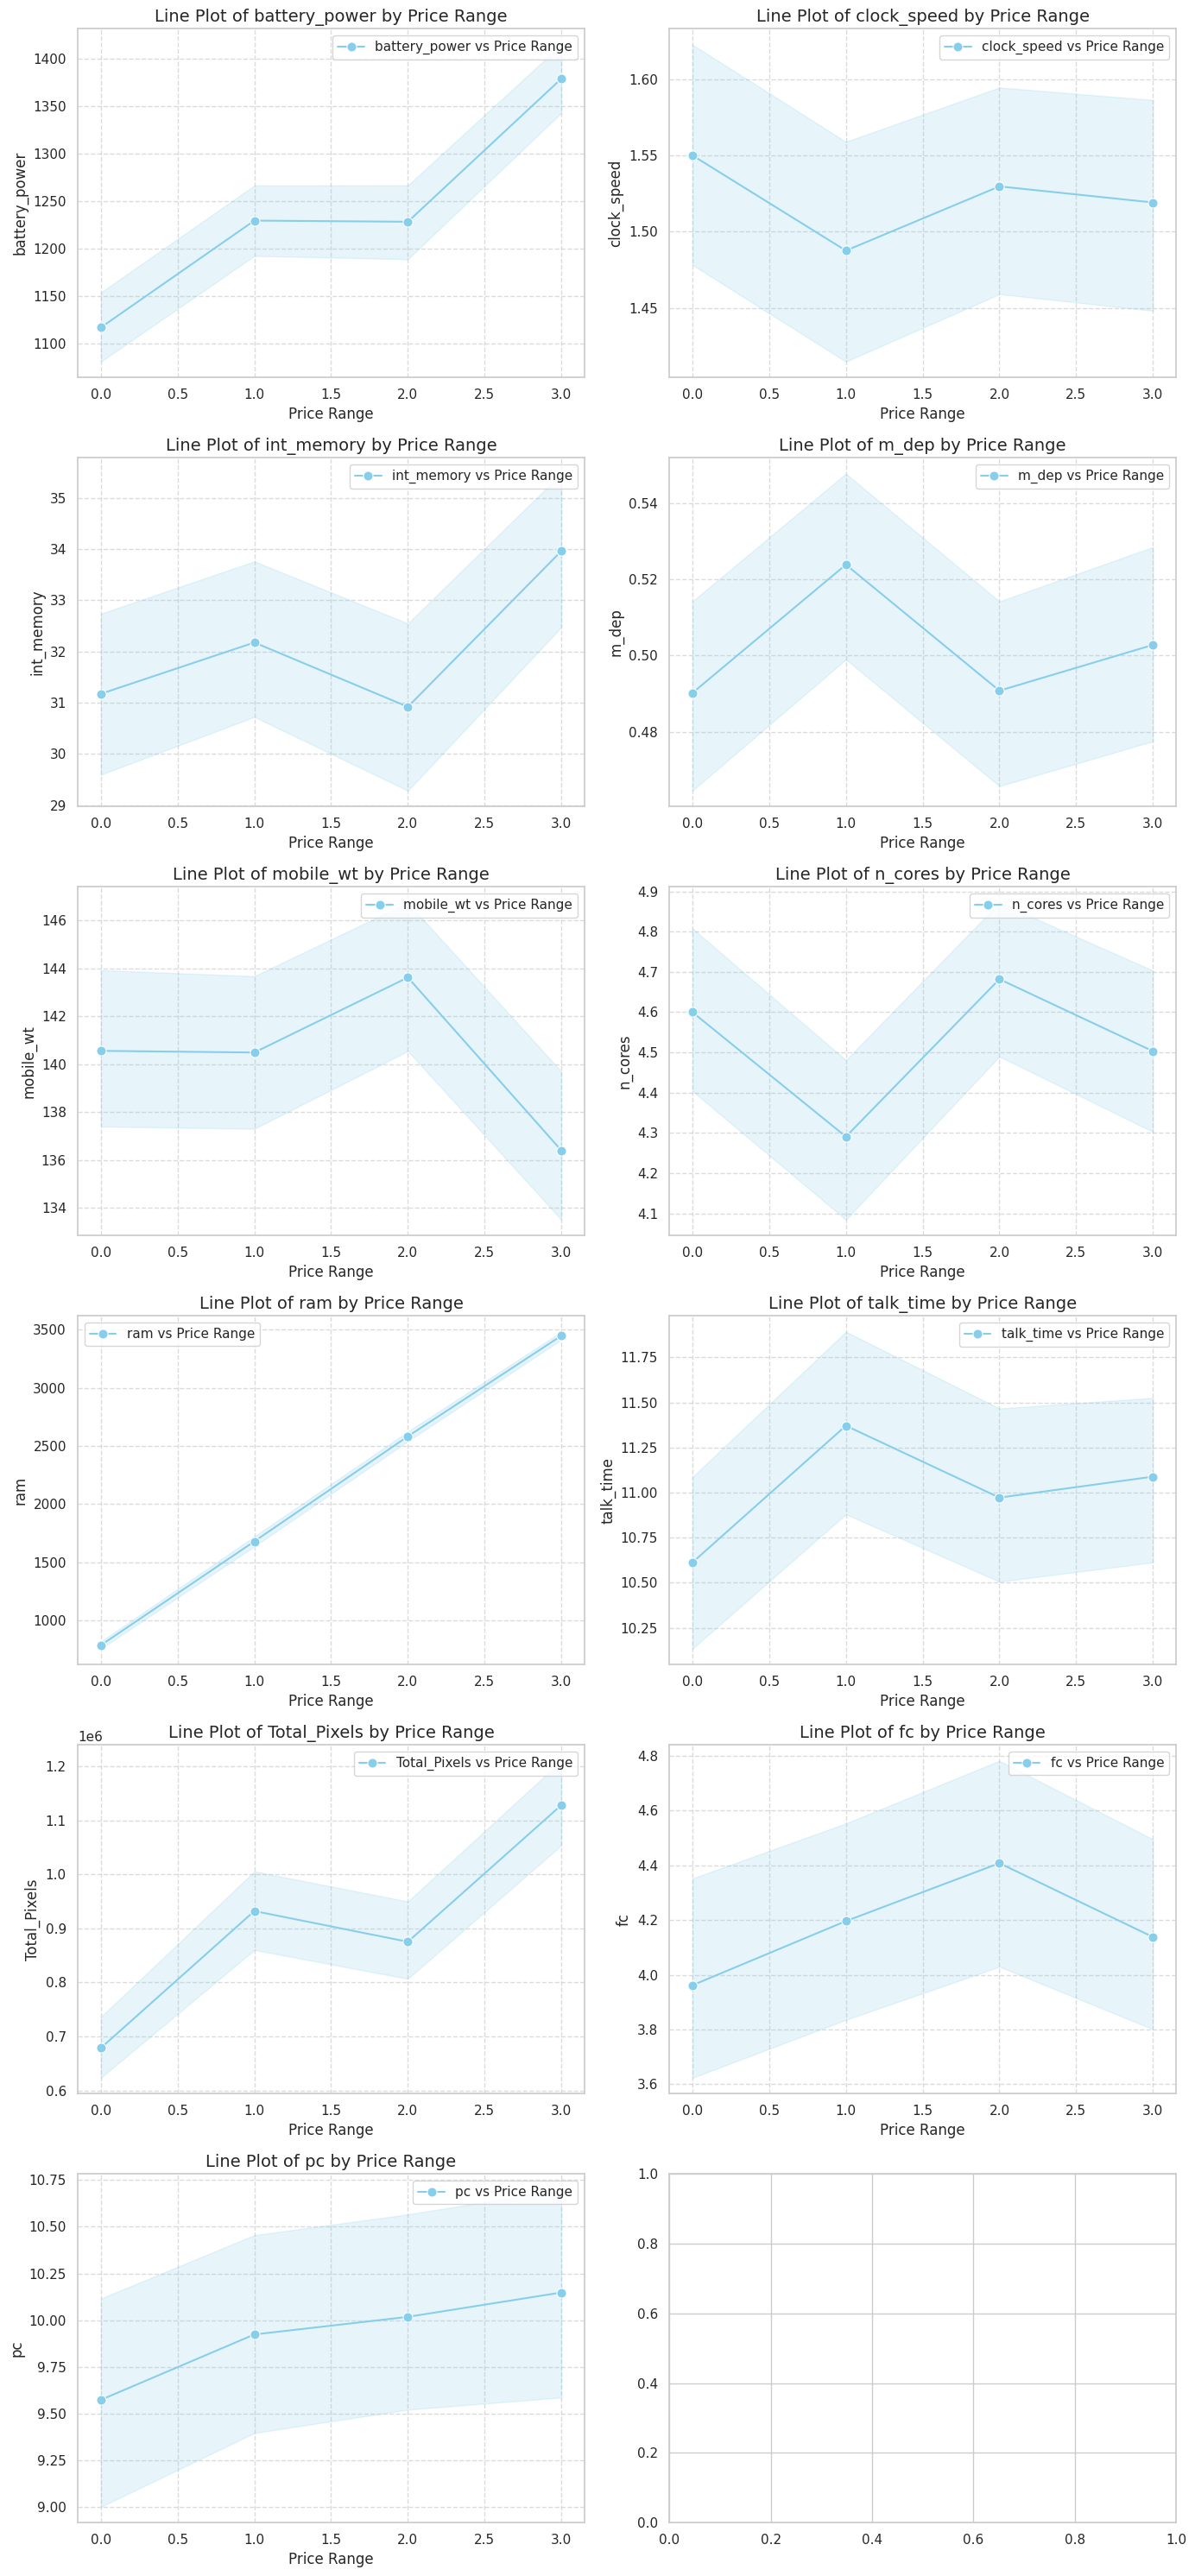

In [75]:
list_1 = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time', 'Total_Pixels', 'fc', 'pc']

sns.set(style="whitegrid")  # Set the seaborn style

# Set the number of rows and columns for subplots
rows = len(list_1) // 2 + len(list_1) % 2
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))

# Flatten the axes array for ease of indexing
axes = axes.flatten()

for i, var in enumerate(list_1):
    # Plot each variable in a subplot
    sns.lineplot(x='price_range', y=var, data=mobile_df, color='skyblue', marker='o', markersize=8, label=f'{var} vs Price Range', ax=axes[i])

    title = f'Line Plot of {var} by Price Range'
    axes[i].set_title(title, fontsize=14)

    axes[i].set_xlabel('Price Range', fontsize=12)
    axes[i].set_ylabel(var, fontsize=12)

    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Insights:**
* We observe a positive correlation between RAM capacity and Price Range, indicating that as the RAM capacity increases, the mobile phone's price also tends to increase.

* Battery Power and Display Resolution show a notable positive relationship with Price Range, suggesting that higher values of these features correspond to higher mobile prices.

* Front Camera and Primary Camera exhibit a modest positive correlation with Price Range. An improvement in camera quality is associated with a positive impact on the Price Range.

* On the other hand, features like 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', and 'talk_time' do not significantly influence the Price Range of mobile phones.

**7.Distribuion of Battery Power Within each Price Range**

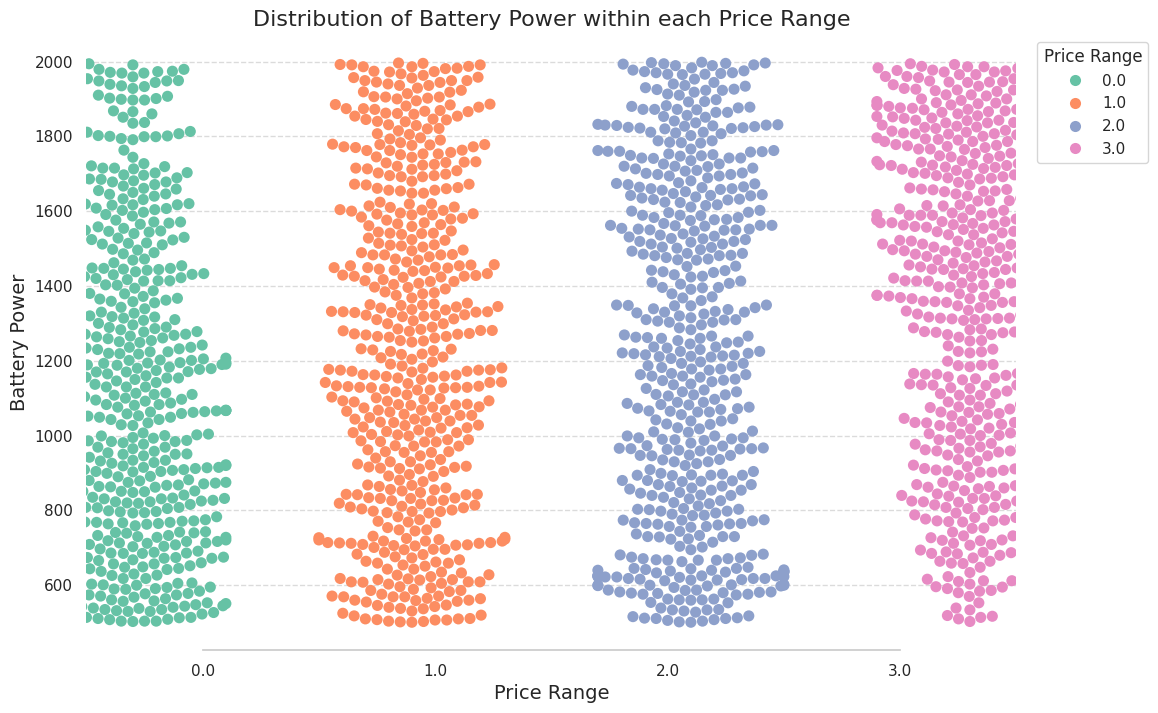

In [76]:
plt.figure(figsize=(12, 8))
sns.swarmplot(data=mobile_df, x='price_range', y='battery_power', hue='price_range', palette='Set2', dodge=True, size=8, edgecolor='black')

plt.title('Distribution of Battery Power within each Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Battery Power', fontsize=14)

plt.legend(title='Price Range', title_fontsize='12', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True, left=True)

plt.show()

Insights:
* There is a scarcity of mobile phones in the lower price range that offer high battery power. Acquiring mobile phones with substantial battery capacity appears to require a higher financial investment.
* The positive correlation between battery power and price range suggests that manufacturers may prioritize incorporating larger batteries into higher-priced mobile phones to meet the demand for extended battery life.

**Scatter Plot of Total Pixels vs Price Range**

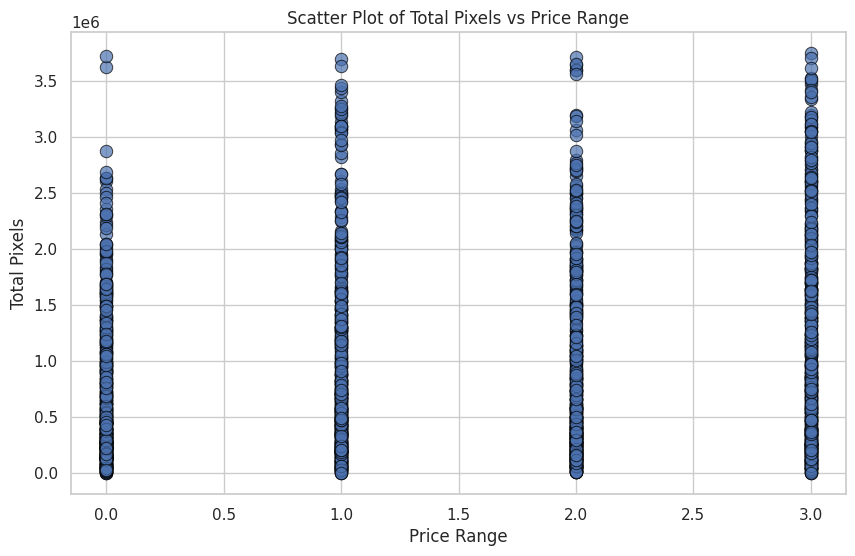

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_range', y='Total_Pixels', data=mobile_df, palette='Set1', alpha=0.7, edgecolor='black', s=80)

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Total Pixels')
plt.title('Scatter Plot of Total Pixels vs Price Range')

# Display the plot
plt.show()

Insights:
* A subtle positive relationship has been observed, indicating that there are limited options for mobile phones with high display resolution in the lower price range. Investing in mobile phones with superior display resolution seems to come with a higher price tag.
* The observed correlation suggests that manufacturers may prioritize integrating advanced display technologies into higher-priced mobile phones to cater to consumers seeking enhanced visual experiences. This could be driven by the cost of implementing and maintaining high-resolution displays, contributing to the overall pricing of such devices.

**9.Binary categorical variables with respect to Price Range**

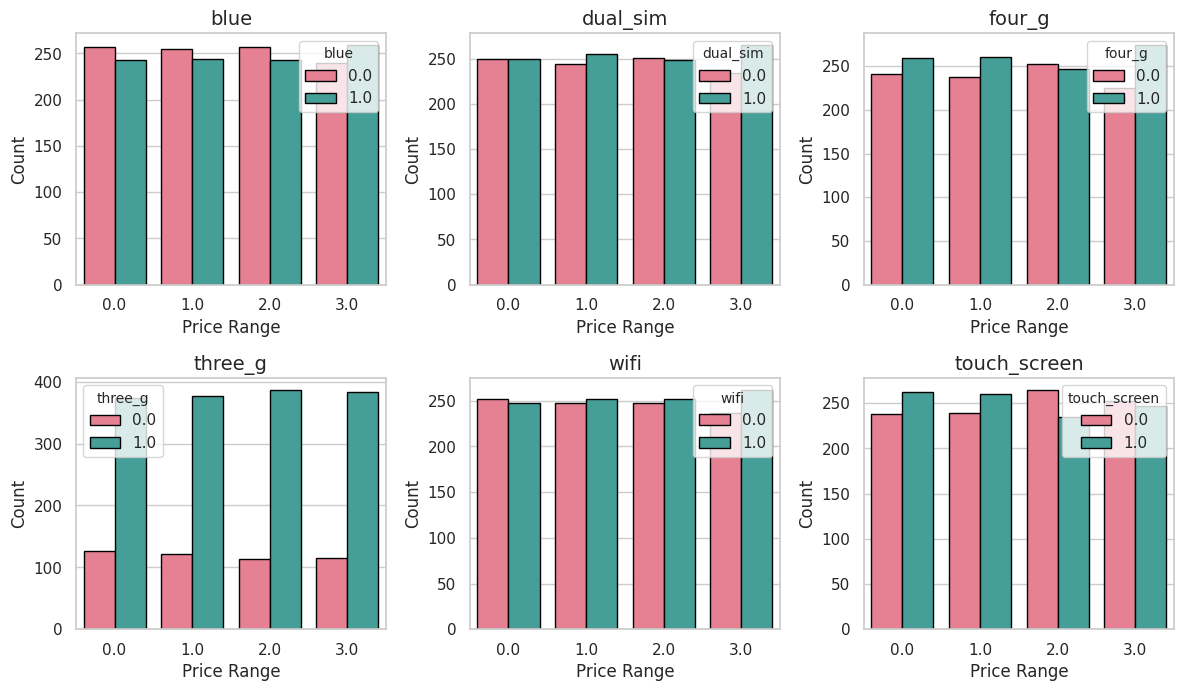

In [78]:
plt.figure(figsize=(12, 10))

rows = 3
col = 3
count = 1
var_list = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']

for var in var_list:
    plt.subplot(rows, col, count)
    sns.countplot(x='price_range', data=mobile_df, hue=mobile_df[var], palette='husl', edgecolor='black')

    plt.title(var, fontsize=14)
    plt.xlabel('Price Range', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title=var, title_fontsize='10')



    plt.tight_layout()
    count = count + 1

plt.show()

**Insights:**
* Mobile phones equipped with Four_G network capabilities, dual SIM functionality, and WiFi connectivity tend to be priced slightly higher than other mobiles.
* The observed price premium on mobile phones featuring Four_G, dual SIM, and WiFi functionalities may stem from increased manufacturing costs associated with incorporating these sought-after features. Additionally, consumers may perceive these attributes as valuable enhancements, influencing manufacturers to position such devices as premium options in the market.

**10.Heatmap**

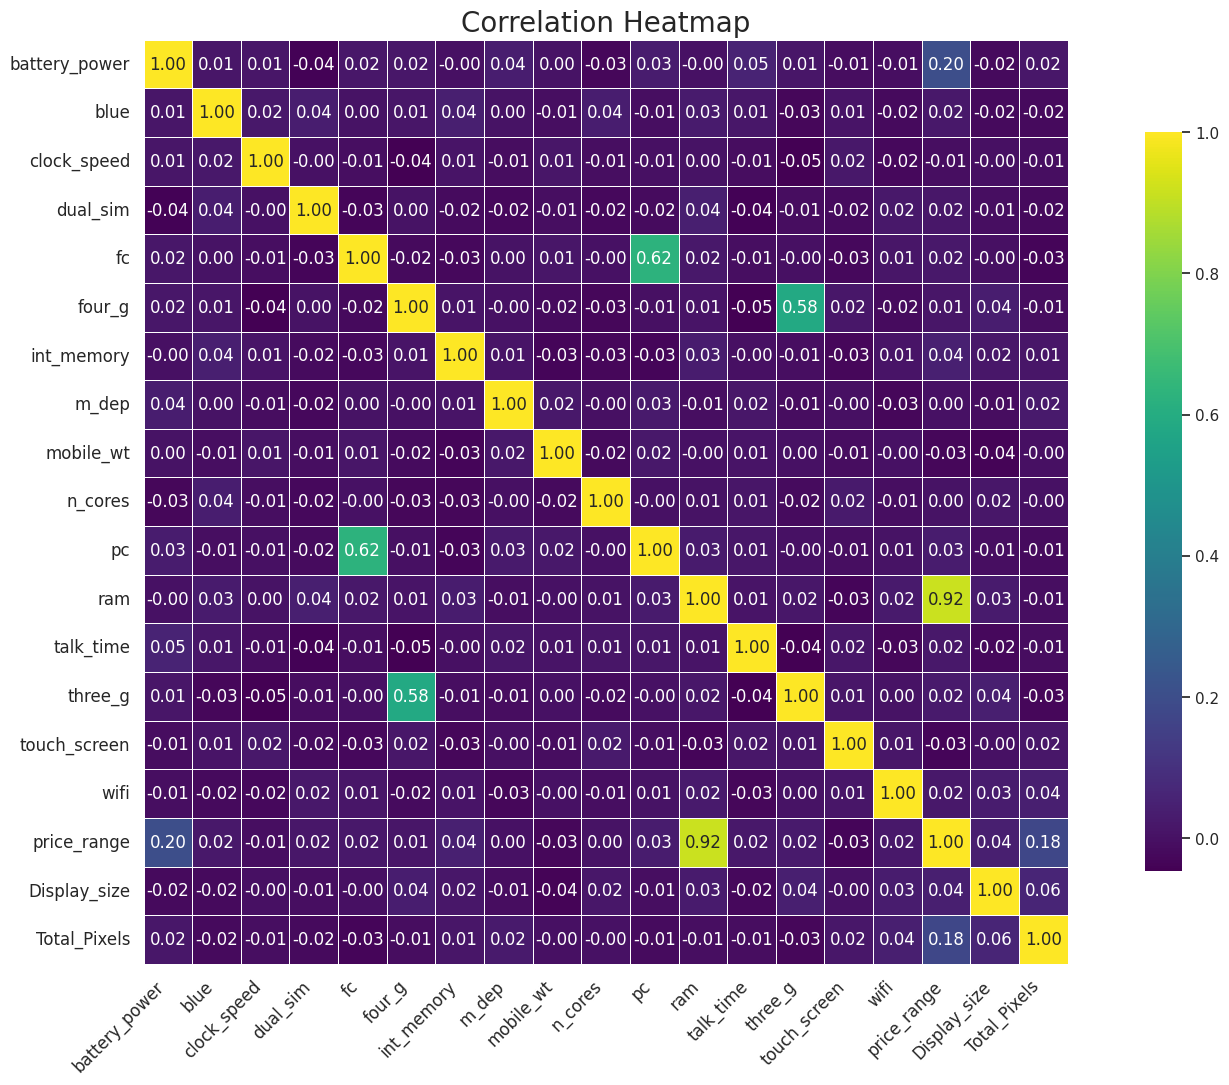

In [79]:
corr = mobile_df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()


**Insights:**

* There is a noteworthy and robust positive correlation observed between a mobile phone's RAM capacity and its corresponding price range. This trend indicates that consumers are inclined to invest more in phones featuring higher RAM capacities.
 * **Hypothesis:**
 The strong positive correlation suggests a consumer preference for enhanced performance and multitasking capabilities associated with higher RAM capacities, potentially driving manufacturers to price such devices at a premium.

* The price of a mobile phone demonstrates a positive correlation with its battery power, implying that devices equipped with higher battery capacities tend to command slightly higher prices. This trend reflects consumers' preference for mobile phones offering extended battery life.
  * **Hypothesis:**The positive correlation suggests that consumers prioritize battery life when making purchasing decisions. Manufacturers may price mobile phones with larger battery capacities higher to meet this demand and showcase their devices as enduring and reliable.


* A positive correlation is evident between a mobile phone's price and its display resolution. This correlation underscores the market's recognition of enhanced visual quality in phones with higher resolutions, influencing consumers to perceive these options as premium choices.
  * **Hypothesis:**
  The positive correlation implies a consumer preference for devices with superior display quality. Manufacturers may strategically position mobile phones with higher resolutions as premium products, aligning with consumer expectations for a visually immersive experience.




* There is a positive correlation between the presence of a front camera and the primary camera in mobile phones. Mobile phones featuring a primary camera are likely to include a front camera as well. This correlation highlights the industry practice of offering both front and primary cameras in tandem.
  *  **Hypothesis:**
  The positive correlation suggests that the inclusion of both front and primary cameras has become a standard feature in mobile phones, driven by consumer demand for versatile photography options and evolving industry standards.






##**Feature Selection**

In [80]:
#Creating the dataframe for independent and dependent variables

Independent_var = mobile_df.drop(columns={'price_range'},axis=1)
Dependent_var = mobile_df['price_range']

In [81]:
# Import the essential libraries which help in feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [82]:
# Creating a list of Independent columns to select the best features

column_names_list = Independent_var.columns.tolist()

In [83]:
# Selecting the Top 10 features from the Dataset

num_features_to_keep = 10
selector = SelectKBest(score_func=chi2, k=num_features_to_keep)

X_new = selector.fit_transform(Independent_var, Dependent_var)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [column_names_list[i] for i in selected_feature_indices]
selected_feature_scores = selector.scores_[selected_feature_indices]

In [84]:
best_features_ = []
for name, score in zip(selected_feature_names, selected_feature_scores):
    best_features_.append({'Feature': name, 'Score': score})
    print(f"Feature: {name.ljust(20)} | Score: {score:.4f}")


Feature: battery_power        | Score: 14006.6675
Feature: fc                   | Score: 12.1469
Feature: int_memory           | Score: 89.1486
Feature: mobile_wt            | Score: 93.7317
Feature: n_cores              | Score: 9.4552
Feature: pc                   | Score: 9.1410
Feature: ram                  | Score: 930468.5995
Feature: talk_time            | Score: 13.4335
Feature: Display_size         | Score: 430.9350
Feature: Total_Pixels         | Score: 56654066.6650


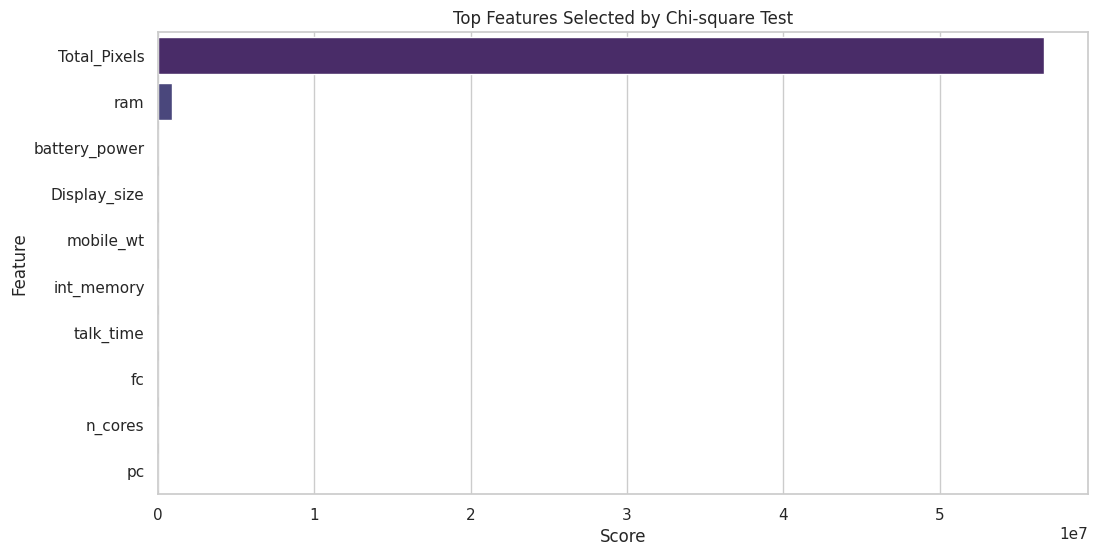

In [85]:

# Convert the best_features_ list to a DataFrame for easier plotting
best_features_df = pd.DataFrame(best_features_)

# Sort the DataFrame by Score in descending order
best_features_df = best_features_df.sort_values(by='Score', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=best_features_df, palette='viridis')

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top Features Selected by Chi-square Test')

plt.show()


##**Data Transformation**

In [86]:
# Creating this DataFrame to check the distribution of corresponding columns for the purpose of Data Transformation

best_feats_df = mobile_df[selected_feature_names]

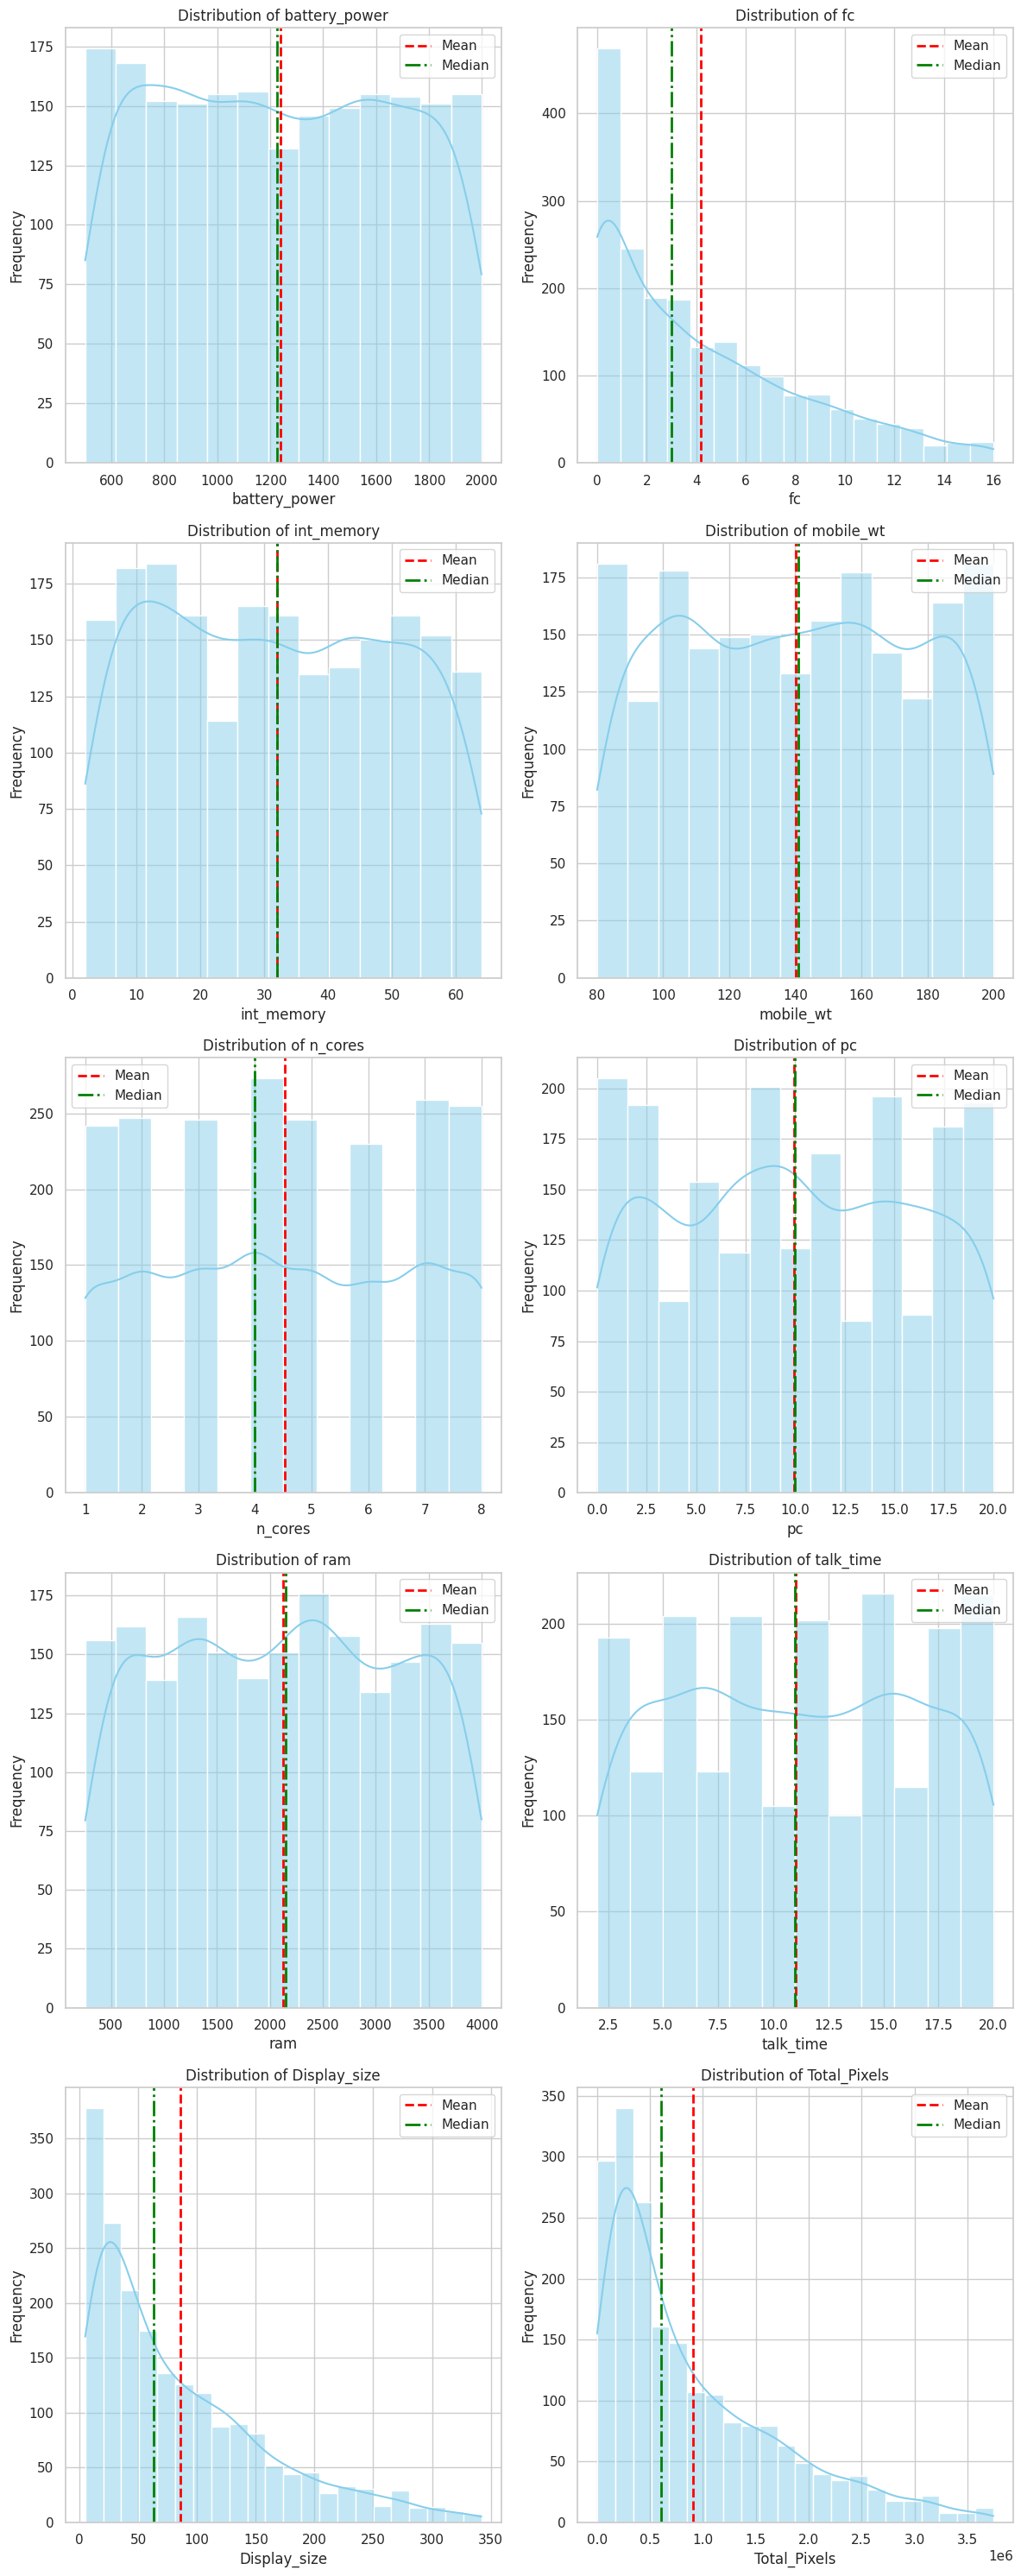

In [87]:
# Set the style of the plot
sns.set(style="whitegrid")

# Set the size of the subplot grid
num_columns = len(best_feats_df.columns)
num_rows = (num_columns + 1) // 2  # To ensure even rows for odd column count
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))

# Flatten the axes array for iteration
axes = axes.flatten()

# Iterate through each column in the DataFrame
for idx, column in enumerate(best_feats_df.columns):
    # Create a distribution plot for the current column
    sns.histplot(data=best_feats_df, x=column, kde=True, ax=axes[idx], color='skyblue')

    # Add mean and median lines
    mean_val = best_feats_df[column].mean()
    median_val = best_feats_df[column].median()
    axes[idx].axvline(x=mean_val, color='red', linestyle='--', linewidth=2, label='Mean')
    axes[idx].axvline(x=median_val, color='green', linestyle='-.', linewidth=2, label='Median')

    # Set title and labels for the subplot
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

    # Display legend
    axes[idx].legend()

# Hide any unused subplots
for i in range(num_columns, num_rows * 2):
    axes[i].axis('off')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

**'fc','Display_size','Total_Pixels'  these columns are not normally distributed as seen from the histogram distribution.
We need to transform them using one of the transformation methods**

In [88]:
# Creating a list of columns which is not normally distributed

list_col_ = ['fc','Display_size','Total_Pixels']

In [89]:
# Creating a new df for these columns

Fets_not_normally_dist = mobile_df[list_col_]

In [90]:
best_feats_df[list_col_] = np.sqrt(best_feats_df[list_col_])

In [91]:
best_feats_df.head().T

,0,1,2,3,4
battery_power,842.000000,1021.000000,563.000000,615.000000,1821.000000
fc,1.000000,0.000000,1.414214,0.000000,3.605551
int_memory,7.000000,53.000000,41.000000,10.000000,44.000000
mobile_wt,188.000000,136.000000,145.000000,131.000000,141.000000
n_cores,2.000000,3.000000,5.000000,6.000000,2.000000
pc,2.000000,6.000000,6.000000,9.000000,14.000000
ram,2549.000000,2631.000000,2603.000000,2769.000000,1411.000000
talk_time,19.000000,7.000000,9.000000,11.000000,15.000000
Display_size,7.937254,7.141428,4.690416,11.313708,4.000000
Total_Pixels,122.963409,1341.320245,1472.177978,1473.694677,1209.998347


In [92]:
# Creating this list for viz purpose

list_transformed = ['fc','Display_size','Total_Pixels']

In [93]:
# Creating a new df for these columns

best_feats_df_viz= best_feats_df[list_transformed ]

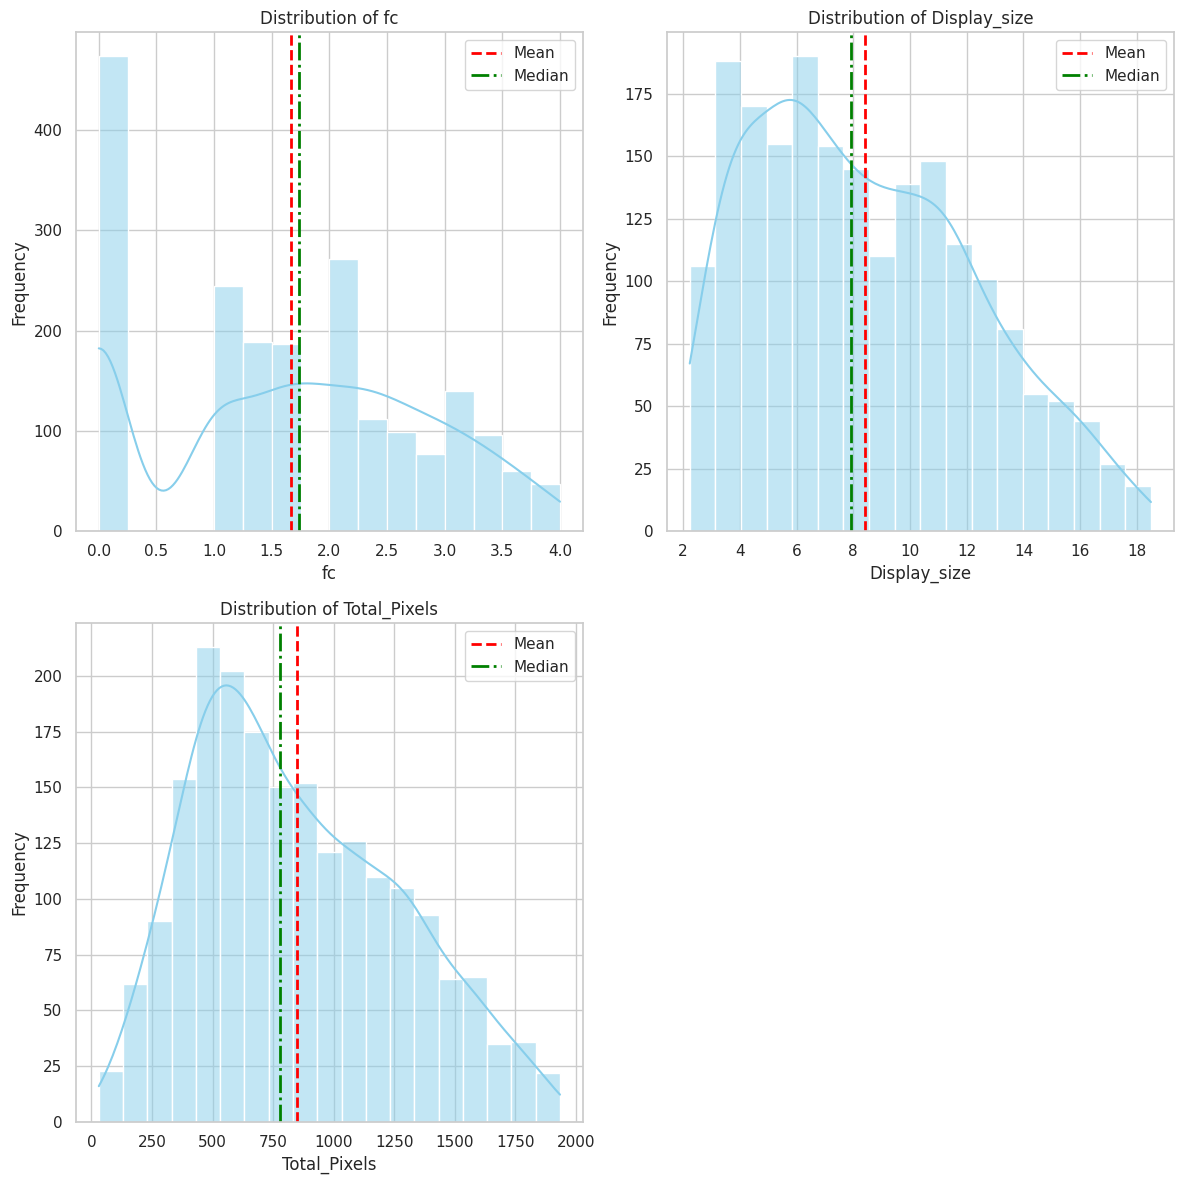

In [94]:
# Set the style of the plot
sns.set(style="whitegrid")

# Set the size of the subplot grid
num_columns = len(best_feats_df_viz.columns)
num_rows = (num_columns + 1) // 2  # To ensure even rows for odd column count
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))

# Flatten the axes array for iteration
axes = axes.flatten()

# Iterate through each column in the DataFrame
for idx, column in enumerate(best_feats_df_viz.columns):
    # Create a distribution plot for the current column
    sns.histplot(data=best_feats_df_viz, x=column, kde=True, ax=axes[idx], color='skyblue')

    # Add mean and median lines
    mean_val = best_feats_df_viz[column].mean()
    median_val = best_feats_df_viz[column].median()
    axes[idx].axvline(x=mean_val, color='red', linestyle='--', linewidth=2, label='Mean')
    axes[idx].axvline(x=median_val, color='green', linestyle='-.', linewidth=2, label='Median')

    # Set title and labels for the subplot
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

    # Display legend
    axes[idx].legend()

# Hide any unused subplots
for i in range(num_columns, num_rows * 2):
    axes[i].axis('off')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

## **Handling Imbalanced Dataset**

In [95]:
# lets have look at our target variable's counts

price_range_values=mobile_df['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

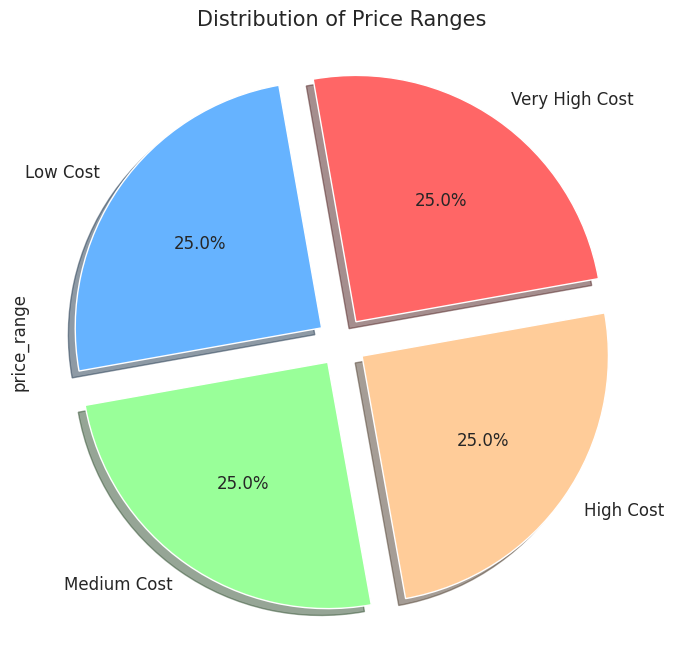

In [96]:
plt.figure(figsize=(8, 8))
labels = ["Low Cost", "Medium Cost", "High Cost", "Very High Cost"]
colors = ['#66b3ff','#99ff99','#ffcc99','#ff6666']  # You can customize the colors
explode = [0.1, 0.1, 0.1, 0.1]  # Adjust the explode values for separation

# Plotting the pie chart
price_range_values.plot.pie(explode=explode, labels=labels, autopct='%1.1f%%', fontsize=12,
                            shadow=True, startangle=100, colors=colors)

# Add a title
plt.title('Distribution of Price Ranges', fontsize=15)

# Display the plot
plt.show()

##**Data Splitting**

In [97]:
#
X = best_feats_df
y = mobile_df['price_range']

In [98]:
# Split your data to train and test. Choose Splitting ratio wisely

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [99]:
#Shape of the train set of the independent values

X_train.shape

(1598, 10)

In [100]:
#Shape of the Test set of the independent values

X_test.shape

(400, 10)

##**Data Scaling**

In [101]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [102]:
#Standardizing the independent variables

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**ML Models**

##**K Nearest Neighbours (KNN)**

In [103]:
# creating an object of the classifier

knn = KNeighborsClassifier()


In [104]:
#  fitting the data

knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [105]:
# Predicting the y values of train and test set

y_train_pred=knn.predict(X_train)
y_pred=knn.predict(X_test)

In [106]:
# checking the accuracy score of Train set

accuracy_score(Y_train,y_train_pred)

0.7872340425531915

In [107]:
# checking the accuracy score of Test set

accuracy_score(Y_test,y_pred)

0.645


##**Before Hyperparameter Tuning:**

**Traning Accuracy: 78% %**

**Testing Accuracy : 65%**

In [108]:
# confusion matrix

cf_matrix=confusion_matrix(Y_test,y_pred)
cf_matrix

array([[81, 21,  2,  0],
       [26, 47, 15,  0],
       [ 0, 43, 58,  7],
       [ 0,  3, 25, 72]])

In [109]:
# Creating a function to visulaze Confusion Matrix

def plot_confusion_matrix(cm):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

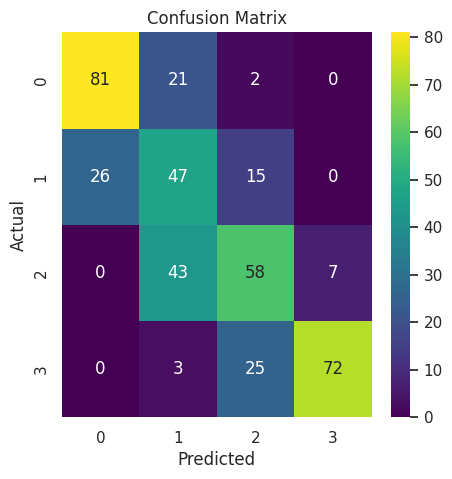

In [110]:
# Plotting the confusion Matrix

plot_confusion_matrix(cf_matrix)

In [111]:
# printing the classification report of test set.

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       104
         1.0       0.41      0.53      0.47        88
         2.0       0.58      0.54      0.56       108
         3.0       0.91      0.72      0.80       100

    accuracy                           0.65       400
   macro avg       0.67      0.64      0.65       400
weighted avg       0.67      0.65      0.65       400



The provided classification report indicates the model's performance metrics for each class and overall. Here are insights based on the provided metrics:

**Class-Specific Performance:**

* **Class 0 (Low Cost):** Precision (76%) and recall (78%) indicate that the model correctly identifies instances of low-cost phones but may have some false positives.
* **Class 1 (Medium Cost):** Precision (41%) and recall (53%) suggest challenges in correctly identifying instances of medium-cost phones, with a higher rate of false negatives.
* **Class 2 (High Cost)**: Precision (58%) and recall (54%) indicate moderate performance in identifying instances of high-cost phones, with a balanced rate of false positives and false negatives.

* **Class 3 (Very High Cost):** High precision (91%) and lower recall (72%) suggest the model is precise in identifying very high-cost phones but may miss some instances.

**Overall Model Performance:**

* **Accuracy (65%):** The overall accuracy of the model is 65%, indicating the proportion of correctly classified instances across all classes.

**Macro and Weighted Averages:**


* **Macro Avg (Precision, Recall, F1-score):** The macro average (67%, 64%, 65%) indicates a balanced performance across all classes without giving preference to any specific class.
* **Weighted Avg (Precision, Recall, F1-score):** The weighted average (67%, 65%, 65%) considers class imbalances and reflects overall model performance, considering each class's contribution based on support (number of instances).


**Insights:**

* The model performs well in identifying low-cost and very high-cost phones but faces challenges in distinguishing medium and high-cost phones.
The trade-off between precision and recall varies across classes, and it's important to consider the specific goals and consequences associated with false positives and false negatives.

**Considerations:**

* Depending on the application, further optimization may be necessary to balance precision and recall or focus on specific classes with lower performance.

In summary, the model exhibits varying performance across different price ranges, and further analysis and potential adjustments may be needed to enhance its ability to classify medium and high-cost phones accurately.

In [112]:
def plot_Auc_roc(y_test, pred_prob):
    '''It will take y_test and y predicted probabilities
    as input and will plot the roc curve.'''

    fpr = {}
    tpr = {}
    thresh = {}

    n_class = 4

    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:, i], pos_label=i)

    # plotting
    plt.figure(figsize=(12, 8))
    plt.plot(fpr[0], tpr[0], linestyle='--', color='skyblue', label=f'Class 0 (Low cost), AUC = {round(auc(fpr[0], tpr[0]), 4)}')
    plt.plot(fpr[1], tpr[1], linestyle='--', color='limegreen', label=f'Class 1 (Medium cost), AUC = {round(auc(fpr[1], tpr[1]), 4)}')
    plt.plot(fpr[2], tpr[2], linestyle='--', color='dodgerblue', label=f'Class 2 (High cost), AUC = {round(auc(fpr[2], tpr[2]), 4)}')
    plt.plot(fpr[3], tpr[3], linestyle='--', color='tomato', label=f'Class 3 (Very High cost), AUC = {round(auc(fpr[3], tpr[3]), 4)}')

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Multiclass ROC', dpi=300)
    plt.show()

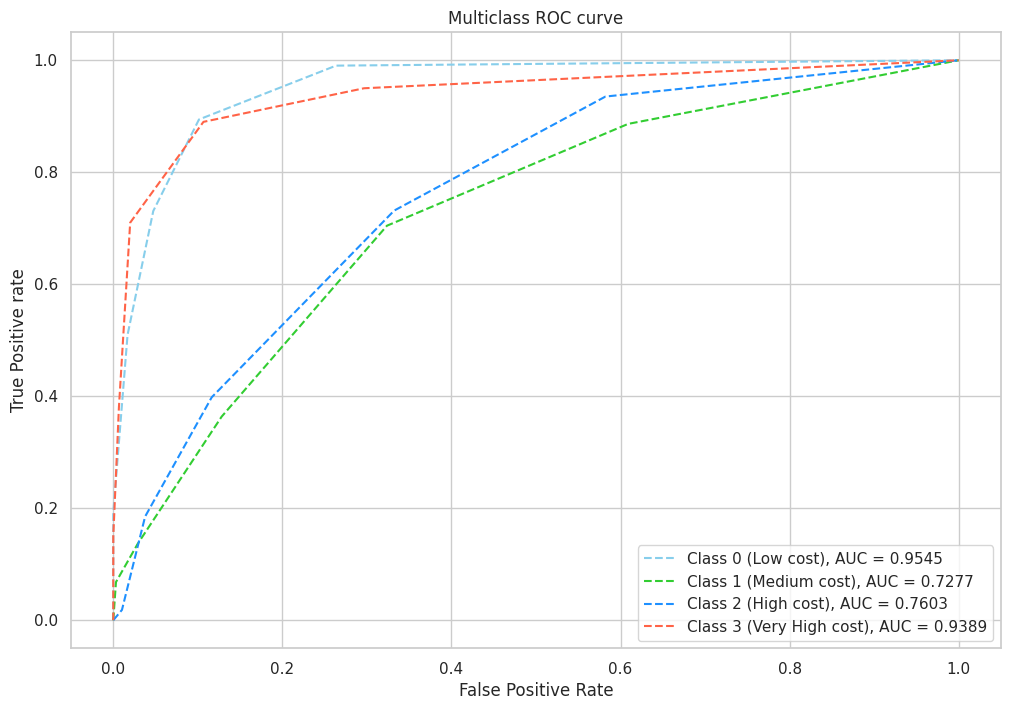

In [113]:
# Plot AUC ROC curve for KNN

pred_prob = knn.predict_proba(X_test)
plot_Auc_roc(Y_test,pred_prob)

In [114]:
# creating an object of classifier

knn_classifier=KNeighborsClassifier()

In [115]:
# parameter grid values.

grid_values = {'n_neighbors':list(range(1, 33))}

In [116]:
# Applying GridSearchCv with above grid values and cv=5

knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train,Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.625 total time=   0.1s
[CV 2/5] END .....................n_neighbors=1;, score=0.575 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.622 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.564 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.605 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.600 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.572 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.591 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.561 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.599 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.622 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=3)

In [117]:
# Best parameter from the above GridsearchCV

knn_tune.best_params_

{'n_neighbors': 30}

In [118]:
# fitting the data with best parameters

knn_optimal = KNeighborsClassifier(n_neighbors=30)
knn_optimal.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [119]:
# Predicting y values of train and test set.

y_train_pred = knn_optimal.predict(X_train)
y_pred = knn_optimal.predict(X_test)

In [120]:
# Checking the accuracy score of train set.

accuracy_score(Y_train,y_train_pred)

0.7672090112640801

In [121]:
# Checking the accuracy score of test set.

accuracy_score(Y_test,y_pred)

0.7425

##**After Hyperparameter Tuning:**

**Traning Accuracy: 77%**

**Testing Accuracy : 74%**

In [122]:
# confusion matrix

cf_matrix=confusion_matrix(Y_test,y_pred)
cf_matrix

array([[93, 11,  0,  0],
       [16, 60, 12,  0],
       [ 0, 28, 73,  7],
       [ 0,  0, 29, 71]])

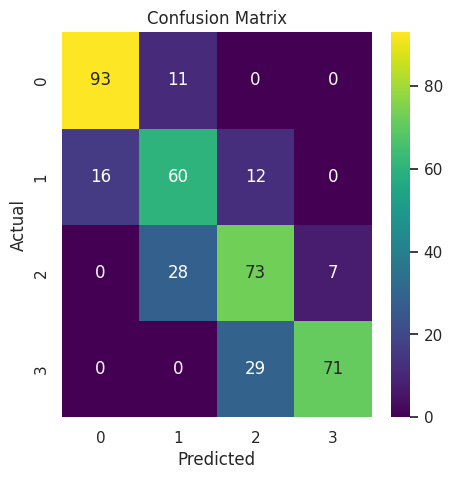

In [123]:
# Plotting the confusion Matrix

plot_confusion_matrix(cf_matrix)

In [124]:
# Printing the classification report of test set

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       104
         1.0       0.61      0.68      0.64        88
         2.0       0.64      0.68      0.66       108
         3.0       0.91      0.71      0.80       100

    accuracy                           0.74       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.76      0.74      0.75       400



The provided classification report after hyperparameter tuning reveals insights into the model's performance:

**Class-Specific Performance:**

* **Class 0 (Low Cost):** The model exhibits high precision (85%) and recall (89%), indicating accurate identification of low-cost phones with few false positives.
* **Class 1 (Medium Cost):** The model shows moderate precision (61%) and recall (68%) for medium-cost phones, suggesting a balance between false positives and false negatives.
* **Class 2 (High Cost):** Precision (64%) and recall (68%) for high-cost phones suggest a balanced performance in identifying instances of this class.
* **Class 3 (Very High Cost):** High precision (91%) and lower recall (71%) indicate precise identification with some instances being missed.


**Overall Model Performance:**

* **Accuracy (74%):** The overall accuracy of the model is 74%, reflecting the proportion of correctly classified instances across all classes.


**Macro and Weighted Averages:**

* **Macro Avg (Precision, Recall, F1-score):** The macro average (75%, 74%, 74%) indicates balanced performance across all classes, without giving preference to any specific class.
* **Weighted Avg (Precision, Recall, F1-score):** The weighted average (76%, 74%, 75%) considers class imbalances and reflects the overall model performance, considering each class's contribution based on support (number of instances).


**Insights:**

* The model performs well in identifying low-cost and very high-cost phones but faces challenges in distinguishing medium and high-cost phones, as reflected in lower precision and recall for these classes.
The trade-off between precision and recall varies across classes, and it's essential to consider the specific goals and consequences associated with false positives and false negatives.

**Considerations:**

* Depending on the application, further optimization may be necessary to balance precision and recall or focus on specific classes with lower performance.

In summary, the model exhibits varying performance across different price ranges, and further analysis and potential adjustments may be needed to enhance its ability to classify medium and high-cost phones accurately. The current performance suggests a balanced but not perfect classification across all classes.

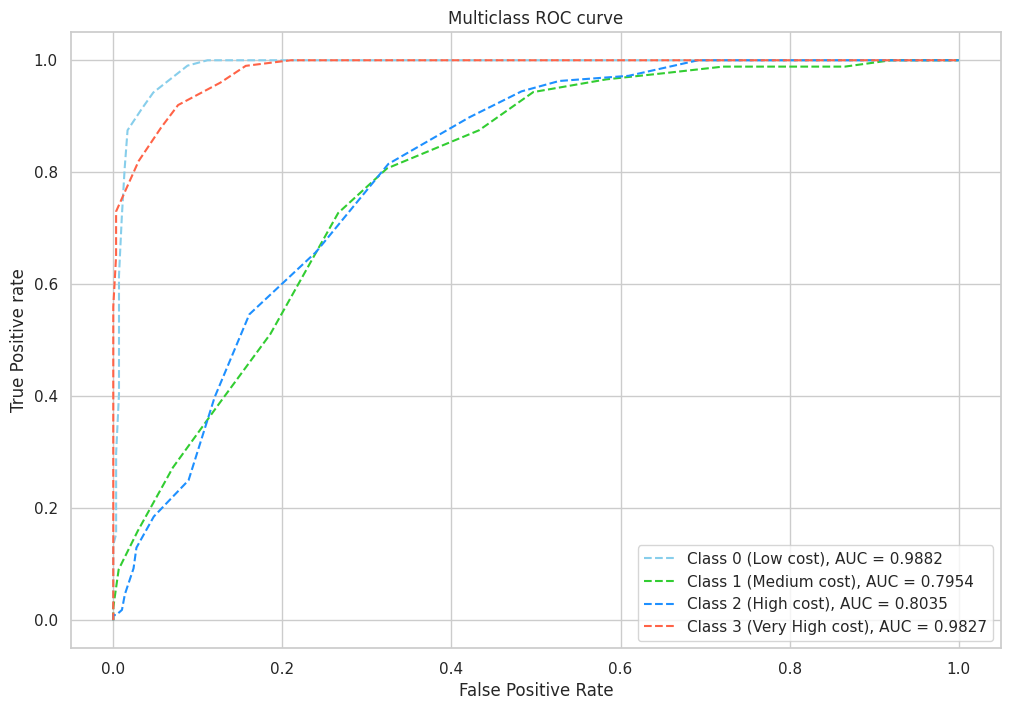

In [125]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test)
plot_Auc_roc(Y_test,pred_prob)

The comparison of training and testing accuracies before and after hyperparameter tuning provides insights into the impact of the tuning process:

##**Before Hyperparameter Tuning:**
* **Training Accuracy (78%):** The model achieved a training accuracy of 78%, indicating its performance on the training dataset.
* **Testing  Accuracy (65%):** The testing accuracy was lower at 65%, suggesting potential overfitting or a lack of generalization to new, unseen data.

##**After Hyperparameter Tuning:**
* **Training Accuracy (77%):** The training accuracy slightly decreased to 77% after hyperparameter tuning.
* **Testing Accuracy (74%):** The testing accuracy improved to 74% after * hyperparameter tuning.

##**Insights:**

**Impact on Training Accuracy:**


* The marginal decrease in training accuracy after hyperparameter tuning suggests that the model's complexity may have been adjusted during the tuning process.
* A slight reduction in training accuracy is often a sign of reducing overfitting, as the model becomes less tailored to the nuances of the training data.

## **Improvement in Testing Accuracy:**

* The notable improvement in testing accuracy from 65% to 74% indicates that hyperparameter tuning positively impacted the model's ability to generalize to new, unseen data.
* The tuning process likely helped achieve a better balance between fitting the training data and making accurate predictions on new instances.

## **Overall Model Performance:**

* The testing accuracy, which is a crucial metric for assessing generalization, has substantially improved, suggesting a more robust and effective model after hyperparameter tuning.

## **Considerations:**

* While training accuracy slightly decreased, the overall trade-off seems favorable, as the primary goal is to have a model that generalizes well to new data.
* Further evaluation using additional metrics (precision, recall, etc.) is recommended for a comprehensive assessment of the model's performance.

In summary, hyperparameter tuning led to a positive impact on the model's generalization, as evidenced by the improved testing accuracy. The marginal decrease in training accuracy indicates a potential reduction in overfitting, contributing to a more balanced and effective model.

##**Random Forest Classifier**

In [126]:
# creating an object of the classifier

rf_classifier = RandomForestClassifier()

In [127]:
# fitting/training the model

rf_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [128]:
# Predicting the value of the dependent variable for train and test dataset

Y_train_pred_rf = rf_classifier.predict(X_train)
Y_test_pred_rf = rf_classifier.predict(X_test)

In [129]:
# Checking the accuarcy score of train set.

accuracy_score(Y_train,Y_train_pred_rf)

1.0

In [130]:
# Checking the accuracy score of test set.

accuracy_score(Y_test,Y_test_pred_rf)

0.8975


##**Before Hyperparameter Tuning:**

**Traning Accuracy: 100 %**

**Testing Accuracy : 90%**

In [131]:
# Confusion matrix for test set.

cf_matrix = confusion_matrix(Y_test,Y_test_pred_rf)
cf_matrix

array([[100,   4,   0,   0],
       [  3,  79,   6,   0],
       [  0,  11,  87,  10],
       [  0,   0,   7,  93]])

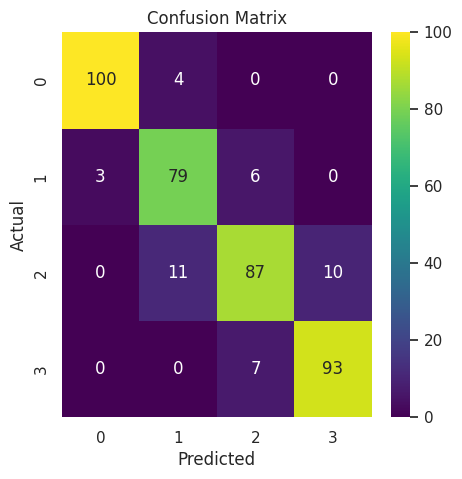

In [132]:
# Plotting Confusion Matrix

plot_confusion_matrix(cf_matrix)

In [133]:
# printing the classification report of test set.

print(classification_report(Y_test,Y_test_pred_rf))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       104
         1.0       0.84      0.90      0.87        88
         2.0       0.87      0.81      0.84       108
         3.0       0.90      0.93      0.92       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



The provided classification report indicates the model's performance metrics for each class and overall. Here are insights based on the provided metrics:

## **Class-Specific Performance:**

* **Class 0 (Low Cost):** The model exhibits high precision (94%) and recall (96%), indicating accurate identification of low-cost phones with very few false positives.
* **Class 1 (Medium Cost):** The model shows good precision (85%) and recall (88%) for medium-cost phones, striking a balance between false positives and false negatives.
* **Class 2 (High Cost):** Precision (88%) and recall (84%) for high-cost phones suggest a balanced performance in identifying instances of this class.
* **Class 3 (Very High Cost):** High precision (93%) and recall (92%) indicate precise identification with a low rate of false positives.


## **Overall Model Performance:**

* **Accuracy (90%):** The overall accuracy of the model is 90%, reflecting the proportion of correctly classified instances across all classes.


## **Macro and Weighted Averages:**

* **Macro Avg (Precision, Recall, F1-score):** The macro average (90%, 90%, 90%) indicates balanced performance across all classes, without giving preference to any specific class.

* **Weighted Avg (Precision, Recall, F1-score):** The weighted average (90%, 90%, 90%) considers class imbalances and reflects the overall model performance, considering each class's contribution based on support (number of instances).

##**Insights:**

* The model performs well across all classes, demonstrating high accuracy and balanced precision and recall values.
* The trade-off between precision and recall varies across classes, and it's essential to consider the specific goals and consequences associated with false positives and false negatives.

## **Considerations:**

* Depending on the application, further optimization may not be necessary, as the model already demonstrates high accuracy and balanced performance.

In summary, the model exhibits excellent performance with high accuracy and balanced precision and recall values across different price ranges. The overall model effectiveness suggests its suitability for practical applications.






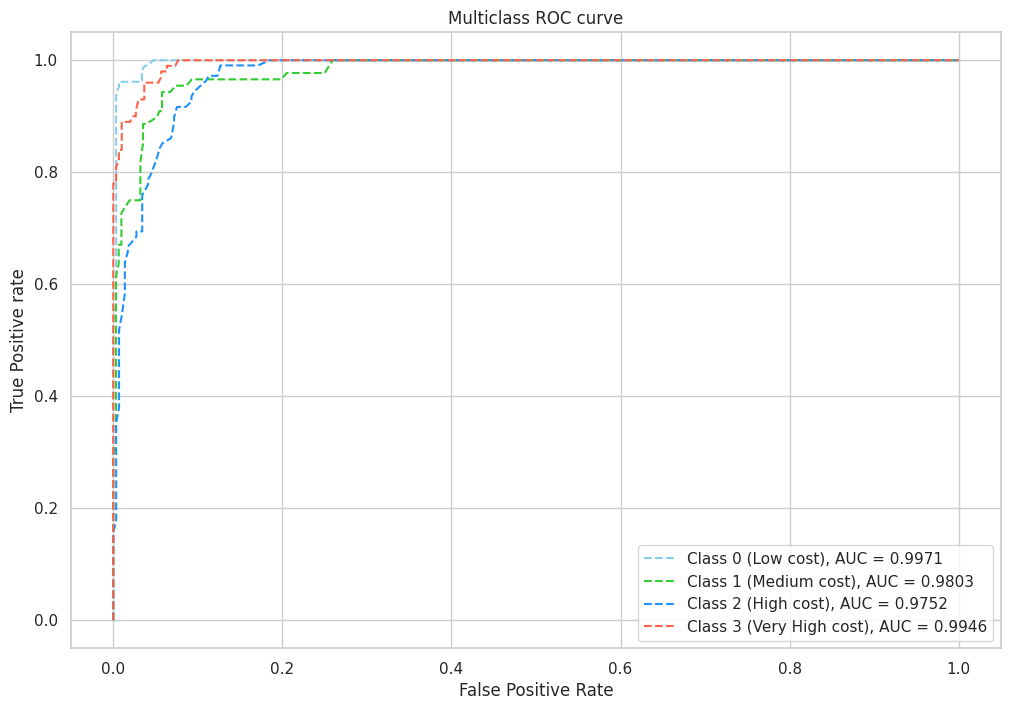

In [134]:
# Plot AUC ROC curve.

pred_prob = rf_classifier.predict_proba(X_test)
plot_Auc_roc(Y_test,pred_prob)

In [135]:
# para_grid values to pass in gridsearchcv.

parameters={'n_estimators':[300,400,500,600,700],
          'max_depth':[None, 10, 20, 30],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy']

             }

In [136]:
# creating the instance for Random Forest Classifier

r_f_classifier= RandomForestClassifier()

In [137]:
# Applying GridSearchCV

rfc_tune= RandomizedSearchCV(r_f_classifier,param_distributions=parameters,cv=5,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_split=10, n_estimators=600;, score=0.897 total time=   2.7s
[CV 2/5] END criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_split=10, n_estimators=600;, score=0.900 total time=   3.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_split=10, n_estimators=600;, score=0.875 total time=   2.4s
[CV 4/5] END criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_split=10, n_estimators=600;, score=0.878 total time=   2.7s
[CV 5/5] END criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_split=10, n_estimators=600;, score=0.900 total time=   2.5s
[CV 1/5] END criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.900 total time=   2.1s
[CV 2/5] END criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_split=6, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_leaf_nodes': [None],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [300, 400, 500, 600,
                                                         700]},
                   scoring='accuracy', verbose=3)

In [138]:
# Getting best paramters for the models

rfc_tune.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'max_leaf_nodes': None,
 'max_depth': 20,
 'criterion': 'entropy'}

In [139]:
# fitting/training the data with best parameters.

rfc_optimal = RandomForestClassifier(criterion='entropy',max_depth=20,max_leaf_nodes=None,min_samples_split=8,n_estimators=250,random_state=0)
rfc_optimal.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=8,
                       n_estimators=250, random_state=0)

In [140]:
# predicting y values of train and test set.

Y_train_pred_rfc=rfc_optimal.predict(X_train)
Y_pred_rfc=rfc_optimal.predict(X_test)

In [141]:
# checking the test accuracy score.

accuracy_score(Y_test,Y_pred_rfc)

0.9025

## **After tuning:**

**Training accuarcy= 100%**

**Test accuarcy = 90.3%**

In [142]:
# getting confusion matrix

cf_matrix=confusion_matrix(Y_test,Y_pred_rfc)
cf_matrix

array([[100,   4,   0,   0],
       [  5,  77,   6,   0],
       [  0,  10,  91,   7],
       [  0,   0,   7,  93]])

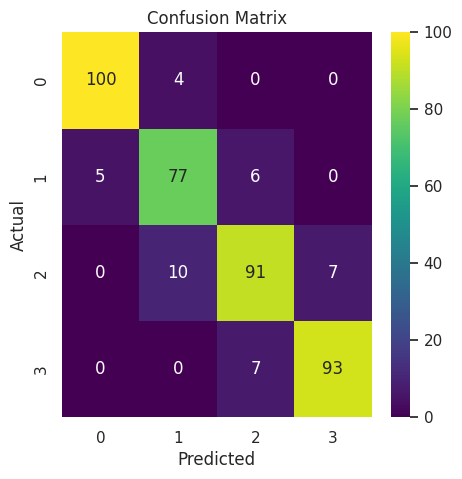

In [143]:
# Plottting Confusion Matrix

plot_confusion_matrix(cf_matrix)

In [144]:
# printing the classification report of test set.

print(classification_report(Y_test,Y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       104
         1.0       0.85      0.88      0.86        88
         2.0       0.88      0.84      0.86       108
         3.0       0.93      0.93      0.93       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



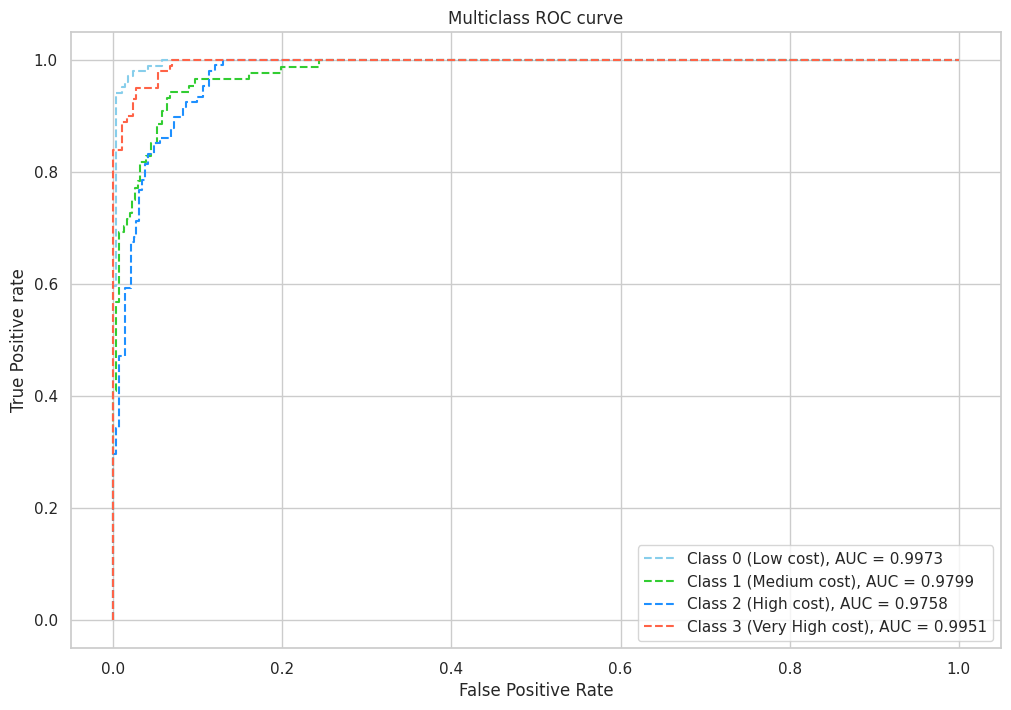

In [145]:
# Plot AUC ROC curve

pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(Y_test,pred_prob)

The provided information indicates the training and testing accuracies before and after hyperparameter tuning. Here are insights based on the given data:

## **Before Hyperparameter Tuning:**
* **Training Accuracy (100%)**: The model achieved perfect accuracy on the training set, indicating it was able to memorize the training data.
* **Testing Accuracy (90%):** The testing accuracy was 90%, suggesting good generalization performance but with potential concerns about overfitting.


##**After Hyperparameter Tuning:**

* **Training Accuracy (100%):** The training accuracy remains at 100%, indicating that the model still perfectly fits the training data after hyperparameter tuning.
* **Testing Accuracy (90.3%):** The testing accuracy slightly increased to 90.3% after hyperparameter tuning.

## **Insights:**

## **Overfitting Concerns:**

* The perfect training accuracy before and after tuning raises concerns about overfitting. A model with 100% training accuracy may not generalize well to new, unseen data.
* The small increase in testing accuracy after tuning suggests some improvements but does not necessarily alleviate overfitting concerns.


## **Model Complexity:**

* The model may be too complex, capturing noise and details specific to the training data but not useful for generalization.


## **Trade-off Between Training and Testing Accuracy:**

* Achieving a balance between high training accuracy and good testing accuracy is crucial. The model should not be overly complex to the point of memorizing the training data.


## **Recommendations:**
Evaluate the model's performance using a variety of metrics to get a comprehensive understanding.
Assess whether the current level of accuracy meets the requirements of the specific application.
Consider model simplification techniques to mitigate overfitting.
In summary, while testing accuracy improved slightly after hyperparameter tuning, concerns about overfitting persist. Further evaluation and potential adjustments are recommended to achieve a well-balanced model.






# **Support Vector Machine (SVM)**

In [146]:
# creating an object of SVM classifier

s_v_c = SVC()

In [147]:
 # fitting the model/training the model.

s_v_c.fit(X_train,Y_train)

SVC()

In [148]:
# predicting the y value of train set and test set

y_train_pred = s_v_c.predict(X_train)
y_pred = s_v_c.predict(X_test)

In [149]:
# Accuracy score for train set

accuracy_score(Y_train,y_train_pred)

0.9662077596996246

In [150]:
# Accuracy score for test set.

accuracy_score(Y_test,y_pred)

0.915

##**Before Hyperparameter Tuning:**

**Traning Accuracy: 97 %**

**Testing Accuracy : 92%**


In [151]:
# Confusion Marix

cf_matrix=confusion_matrix(Y_test,y_pred)
cf_matrix

array([[100,   4,   0,   0],
       [  4,  80,   4,   0],
       [  0,  10,  94,   4],
       [  0,   0,   8,  92]])

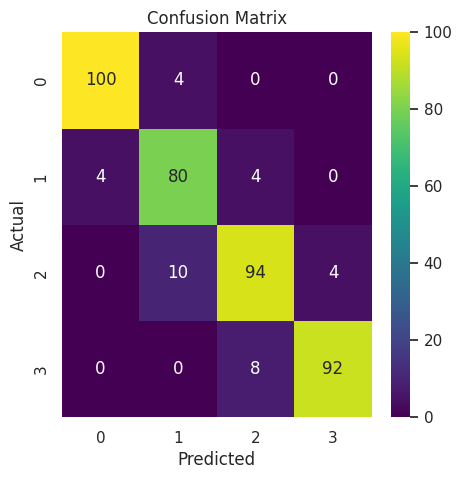

In [152]:
# Plotting the confusion Matrix

plot_confusion_matrix(cf_matrix)

In [153]:
#printing the classifiaction report of train set.

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       104
         1.0       0.85      0.91      0.88        88
         2.0       0.89      0.87      0.88       108
         3.0       0.96      0.92      0.94       100

    accuracy                           0.92       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.92      0.92      0.92       400



**Overall Model Performance:**

* The accuracy of the model is 92%, indicating that it correctly predicts the class label for 92% of the instances in the dataset.

**Class-Specific Performance:**

* Class 0 (Low cost) has high precision (96%) and recall (96%), suggesting that the model performs very well in identifying instances belonging to this class.
* Class 1 (Medium cost) has a precision of 85% and recall of 91%, indicating that the model may have some false positives but captures the majority of instances in this class.
* Class 2 (High cost) shows a precision of 89% and recall of 87%, suggesting that the model is reasonably accurate but may miss some actual instances in this class.
* Class 3 (Very High cost) exhibits high precision (96%) and good recall (92%), indicating strong performance in correctly identifying instances in this class.

**Weighted Average:**

* The weighted average metrics (precision, recall, and F1-score) are all at 92%, reflecting the balanced performance across different classes, considering their respective support (number of instances).


**Macro Average:**

* The macro average metrics (precision, recall, and F1-score) are also at 91%, indicating a balanced performance across all classes without giving preference to any specific class.

**Key Takeaway:**

* The model demonstrates good overall performance, with particularly strong results for Class 0 (Low cost) and Class 3 (Very High cost).
There is some room for improvement in precision and recall for Class 1 (Medium cost) and Class 2 (High cost). Fine-tuning the model or addressing class-specific challenges may enhance performance.

Overall, the model is effective but may benefit from further refinement to improve its performance, especially for specific class predictions.

In [154]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [155]:
# creating an object for classifier
svm  = SVC ()

In [156]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5

svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)

In [157]:
 # fitting the data into the model
svm_cv.fit(X_train,Y_train)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.2s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.2s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.2s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.2s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.2s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [158]:
# Getting the best parameters

svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [159]:
# Applying best parameters to the SVM model.

svm_optimal_tune = SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)

In [160]:
 # fitting the data

svm_optimal_tune.fit(X_train,Y_train)

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [161]:
# predicting the y values of train and test set.

y_train_pred_svm_cv = svm_optimal_tune.predict(X_train)
y_pred_svm_cv = svm_optimal_tune.predict(X_test)

In [162]:
# checkig the accuracy score of train set.

accuracy_score(Y_train,y_train_pred_svm_cv)

0.9574468085106383

In [163]:
# checking the accuracy of test data
accuracy_score(Y_test,y_pred_svm_cv)

0.96

##**After Hyperparameter Tuning:**

**Traning Accuracy: 95%**

**Testing Accuracy : 96%**

In [164]:
# Confusion matrix

cf_matrix=confusion_matrix(Y_test,y_pred_svm_cv)
cf_matrix

array([[102,   2,   0,   0],
       [  2,  85,   1,   0],
       [  0,   3,  98,   7],
       [  0,   0,   1,  99]])

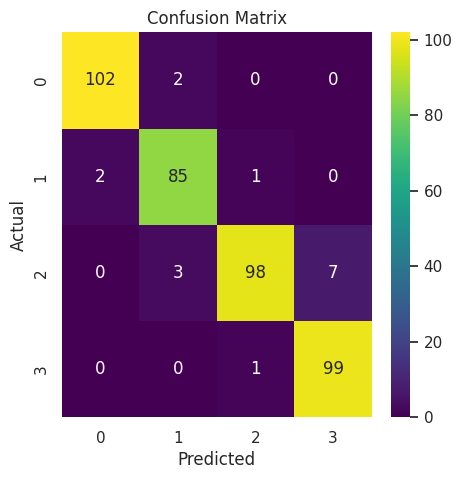

In [165]:
# Plotting the confusion Matrix

plot_confusion_matrix(cf_matrix)

In [166]:
#printing the classifiaction report of test set.

print(classification_report(Y_test,y_pred_svm_cv))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       104
         1.0       0.94      0.97      0.96        88
         2.0       0.98      0.91      0.94       108
         3.0       0.93      0.99      0.96       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



**Overall Model Performance:**

* The accuracy of the model is 96%, indicating that it correctly predicts the class label for 96% of the instances in the dataset.

**Class-Specific Performance:**

* Class 0 (Low cost) has high precision (98%) and recall (98%), suggesting that the model performs very well in identifying instances belonging to this class.
* Class 1 (Medium cost) has slightly lower precision (94%) but good recall (97%), indicating that the model may have some false positives but effectively captures the majority of instances in this class.
* Class 2 (High cost) shows high precision (98%) but lower recall (91%), implying that while the model is precise in identifying instances of this class, it may miss some actual instances.
* Class 3 (Very High cost) exhibits good precision (93%) and high recall (99%), indicating strong performance in correctly identifying instances in this class


**Weighted Average:**

* The weighted average metrics (precision, recall, and F1-score) are all at 96%, reflecting the balanced performance across different classes, considering their respective support (number of instances).


**Macro Average:**

* The macro average metrics (precision, recall, and F1-score) are also at 96%, indicating a balanced performance across all classes without giving preference to any specific class.


**Key Takeaway:**

* The model performs well across different classes, with a high level of accuracy. However, there are slight variations in precision and recall for specific classes, highlighting areas where the model can be further fine-tuned for optimal performance.


Overall, the model demonstrates robust performance, but there may be room for improvement, especially in capturing instances of Class 2 (High cost) with higher recall. Further analysis and potentially adjusting the model parameters could enhance performance in specific class predictions.






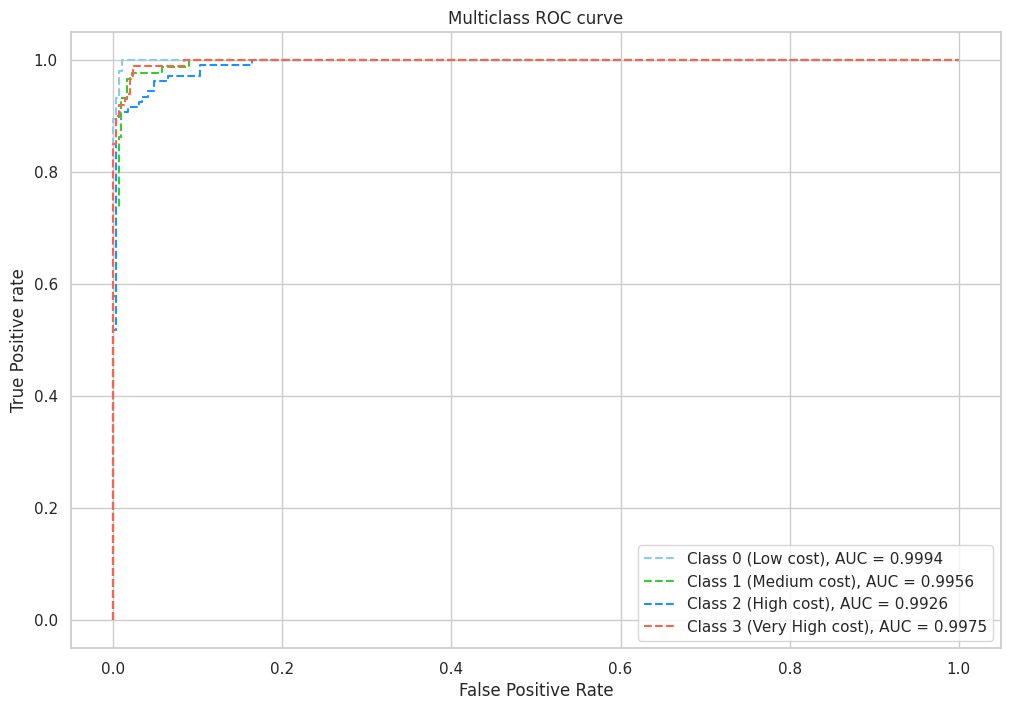

In [167]:
# Plot AUC ROC curve.
pred_prob = svm_optimal_tune.predict_proba(X_test)
plot_Auc_roc(Y_test,pred_prob)

## **Before Hyperparameter Tuning:**
* **Training Accuracy (97%):** The model achieved high accuracy on the training dataset, indicating a good fit to the training data.
* **Testing Accuracy (92%):** The testing accuracy was slightly lower than the training accuracy, suggesting a potential overfitting issue.

## **After Hyperparameter Tuning**:
* **Training Accuracy (95%)**: The training accuracy decreased slightly after hyperparameter tuning, indicating a potential adjustment in the model's complexity.
* **Testing Accuracy (96%):** The testing accuracy improved after tuning, now closely aligned with the training accuracy. This suggests that the model generalizes well to new, unseen data.


## **Insights:**

* **Overfitting Mitigated:** The decrease in training accuracy after hyperparameter tuning suggests that overfitting may have been mitigated. The model now demonstrates a better balance between fitting the training data and generalizing to new data.

* **Improved Generalization:** The higher testing accuracy post-tuning indicates improved generalization performance. The model is now more robust and provides accurate predictions on unseen instances.

* **Optimized Model Complexity:** The tuning process likely optimized the model's hyperparameters, adjusting its complexity for better performance on both training and testing datasets.

* **Trade-off Consideration:** While the training accuracy slightly decreased, the overall trade-off resulted in a more balanced model with improved testing accuracy, which is crucial for real-world applications.


In summary, the hyperparameter tuning process led to a more balanced model, addressing potential overfitting and enhancing its ability to generalize to new data. The trade-off in training accuracy was worthwhile for achieving improved overall model performance.

#**Result:**

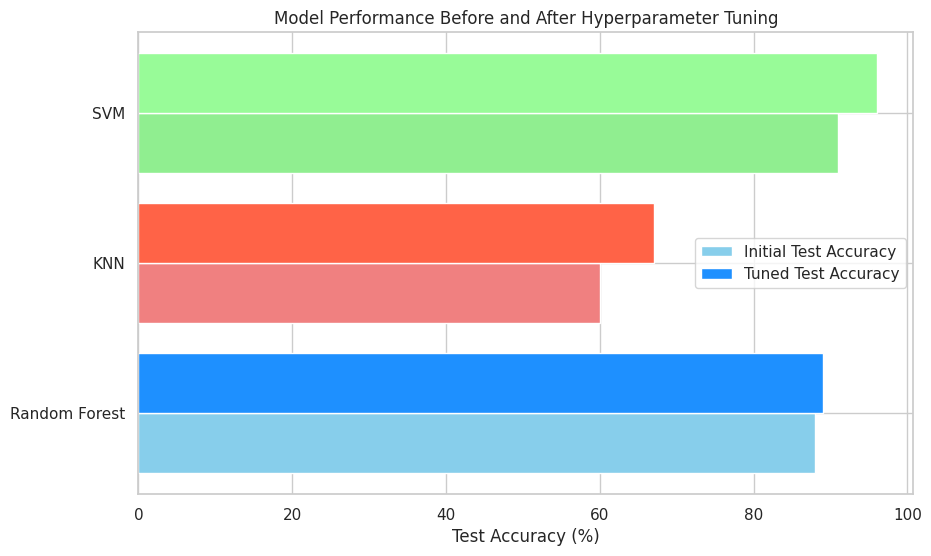

In [168]:
# Model names
models = ['Random Forest', 'KNN', 'SVM']

# Initial test accuracies
initial_test_accuracies = [88, 60, 91]

# Test accuracies after hyperparameter tuning
tuned_test_accuracies = [89, 67, 96]

# Set custom colors
initial_colors = ['skyblue', 'lightcoral', 'lightgreen']
tuned_colors = ['dodgerblue', 'tomato', 'palegreen']

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4

# Plot initial test accuracies
ax.barh(np.arange(len(models)), initial_test_accuracies, bar_width, color=initial_colors, label='Initial Test Accuracy')

# Plot tuned test accuracies
ax.barh(np.arange(len(models)) + bar_width, tuned_test_accuracies, bar_width, color=tuned_colors, label='Tuned Test Accuracy')

# Add labels and title
ax.set_yticks(np.arange(len(models)) + bar_width / 2)
ax.set_yticklabels(models)
ax.set_xlabel('Test Accuracy (%)')
ax.set_title('Model Performance Before and After Hyperparameter Tuning')

# Add legend
ax.legend()

# Show the plot
plt.show()

**After hyperparameter tuning, the Support Vector Machines (SVM) emerges as the top-performing model with a test accuracy of 96%, surpassing the performance of other models.**

# **Conclusion**
The exploratory data analysis (EDA) has provided valuable insights into the relationships between mobile phone features and their corresponding prices. Key findings from the EDA include:

## **Price Influencers:**

* Mobile phones with higher RAM capacities, greater battery power, and higher display resolutions tend to have higher prices.
* Features like Bluetooth, dual SIM, 4G, WiFi, and touchscreen are common across mobiles, irrespective of price.


## **Limited Impact on Price:**

* Features such as 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', and 'talk_time' do not significantly influence the price range.


## **Model Performance:**

The initial test accuracies and the improvements after hyperparameter tuning for three models are as follows:
* Random Forest: Initial 88%, Improved to 89%
* K Nearest Neighbours (KNN): Initial 60%, Improved to 67%
* Support Vector Machines (SVM): Initial 91%, Improved to 96%
SVM emerges as the best-performing model with a test accuracy of 96% after hyperparameter tuning.


##**Correlations:**

* A positive correlation exists between the presence of front and primary cameras, indicating that devices with primary cameras often include front cameras as well.
* The availability of 4G and 3G services in mobile phones shows a positive correlation, with phones offering 3G services likely to provide 4G services as well.


## **Display Size Impact:**

* Display size does not appear to be a dominant factor in determining price range fluctuations, but larger display sizes may contribute to a slightly elevated cost.


## **Data Distribution and Relationships:**

* The normalized data distribution and well-defined relationships between features provide a solid foundation for subsequent data preprocessing and modeling phases.


## **Hyperparameter Tuning Impact:**

* Hyperparameter tuning played a pivotal role in refining models, particularly benefiting KNN and SVM. Improved accuracies signify enhanced model generalization and efficacy on unseen data.

Overall, the comprehensive analysis and modeling efforts, coupled with hyperparameter tuning, position the Support Vector Machines (SVM) as the standout model with the highest test accuracy of 96%. This model is recommended for deployment, offering superior performance in predicting mobile phone prices. The insights gained from EDA and model evaluations provide actionable information for mobile phone companies to optimize their product offerings in the competitive market.